<a href="https://colab.research.google.com/github/abnormalPotassium/SteamSalesModeling/blob/main/SteamSalesStrategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data-based Determinants of Steam Sales
CUNY SPS

MSDS 698 - Capstone Project

Taha Ahmad

5-14-2024


---
## Abstract

In this research paper, we present a methodological approach aimed at extracting and analyzing data from various APIs to gather comprehensive insights into video games released within the past decade. Emphasis was placed on extracting modifiable information relevant to developers, while disregarding static factors such as temporal context. The acquired data underwent rigorous processing through API integration to enhance historical sales records and extract additional features from textual descriptions. Subsequently, predictive models were constructed and systematically compared. Although the most compelling model of an OLS exhibits moderate accuracy with a high RMSE of $56,250 in predicting game sales, it offers valuable guidance for developers seeking to optimize their sales strategies. Key insights include the efficacy of features such as HDR support, juxtaposed with the potential deterrent effect of numeric-heavy game descriptions.


---

## Keywords

Market Research, Machine Learning, Video Games, Interpretability,  Logistic Regression


---
## Problem Statement

The gaming industry is a sleeping tiger in regards to profit potential for investors and businesses alike. In 2023, the global market for games reached 184 billion USD in revenue (Wijman, 2024). This can be directly compared to the global box office revenue for movies in 2023 hitting \\$33.9B (Mitchell, 2024) or the global music market revenue hitting \\$28.6B the same year (IFPI, 2024). This difference of about six times more revenue than these well-established giants of entertainment, showcases the potential for profitability within the video game industry.

The video game industry is made up of multiple sectors though, and we specifically want to focus on the \\$38.4B slice of the market that is attributed to games sold for use on computers. As this is the fastest growing portion of the industry with +5.3% year over year growth last year. Broken down further there are multiple different platforms that sell games on PC, but the largest by far is Valve’s Steam marketplace with \\$8.8B in 2023 revenue and 132M monthly active users that will only have grown since the last count in 2021 (Steamworks Development, 2022). Those are 132 million potential customers to sell to, but every new game that comes out is competing with the 108k and counting other games on the storefront (SteamDB, 2024). Large game development companies are able to compete on the marketplace through having existing loyal customers and large marketing budgets. However, independent developers and smaller companies cannot feel confident in their new releases selling even if they are certain in the quality of the product.

Therein lies the crux of the problem we want to tackle: How can a small developer release a game on Steam and stand out amongst the multitude of competitors? We want to take a data driven approach to solving this problem by gathering data available through Steam and third-party APIs to extract features for previously released games. With the data we aim to build a predictive model that is able to accurately assess which features get games by small developers in the hands of the most Steam users as possible. Ideally this research will be able to be used by developers to improve their sales with minimal changes to the vision of the product that they want to release.

The issue at hand hinges on the fact that small game developers have many disadvantages selling their games on Steam mainly owing to a lower marketing budget, less insight into the market, and mostly non-existent customer recognition. Yet, there is still the occasional success story of a small developer creating the latest hit game that's taken the Internet by storm. In theory, these games that are ending up much more successful should be doing something tangibly different. Taking a data-driven approach, relying on game information provided by Steam, to resolve this problem allows us to distill our research question down to:

What developer actions and game features can small game developers listing their game on Steam utilize to achieve the most sales?




---
## Literature Review


Our literature review starts off with us taking a look at those studies which have a similar goal to ours. Right off the bat, we are able to find Game Data Analytics using Descriptive and Predictive Mining with the same goal to help developers sell their games better. The authors tackle this by iterating on a clustering algorithm for a large number of games and features extracted from Steam APIs. The clusters that they build essentially segment games into those that sold better and those that sold worse based on characteristics like player average playtime and user review rating (Prathama, Asmara, & Barakbah, 2020). It is good information for us to keep in mind that average playtime and user review ratings are important predictors for how well a game sells. This is a sentiment that is echoed in other literature as well along with the affect that having a certain publisher or genre can have on a game (Sacranie, 2010; Cox, 2013). However, we won’t be using the playtime and quality predictors as they are not necessarily something that the developer themselves is able to change when releasing a game on the Steam storefront.  A developer can attempt to make their game as good as possible, but that doesn’t necessitate a good review from most players or players contributing more time into their game. We want to focus on those variables that the developer is quickly able to change without compromising their vision.

Following that line of thought we move on to find studies where we can locate these variables that are easily changed but also contribute to sales. Value Creation in the Video Game Industry is a review paper that attempts to tackle making a broad economic overview of the industry and highlighting what marketing and research in the industry has found to lead to higher profits. We’re not terribly interested in the generic overview of the industry. However, deeper insights into phenomenon that lead to increased sales such as direct network effects which consist of large positive feedback loops in sales is something that we’re keeping a watch out for in our data when creating our models. More importantly for us there is discussion regarding social media marketing and sentiment positively affecting sales (Marchand & Hennig-Thurau, 2013). YouTube is also showcased as another avenue for having positive effects on sales when looking at other research (Adigüzel, 2021). In theory, we should be able to mine for social media information regarding the developers or publishers of the game to see if they have been engaging in social media marketing along with evaluating the response sentiment. Both of these would become powerful parts of our model if achieved.

Text mining information can be a powerful tool even if it isn’t applied to social media. After looking into the previous avenue of data mining, we headed towards looking for information on how to optimize mining data from product descriptions. Each game on the Steam store has a large product description in order to inform the potential consumer what exactly the game is about, and more importantly attempt to sell the game to them. Description mining for games was a very sparse research topic when looked into, but general information about product descriptions was much more forgiving. The Association for Computing Machinery put out research on utilizing models to extract the features from the description of a product semi-automatically. The process involves manually creating a set of common variables from within the descriptions that could be extracted by searching upon it (Acher, Cleve, Perrouin, Heymans, & Vanbeneden, 2012). Mining common information from the description for our project will follow suit in a similar manner, where we manually outline what common variables we want to extract from our descriptions.

A multitude of other features for the games that we are analyzing will be extracted directly through the Steam page. Which is why the next related topic regarding our research has to do with finding out what features that a game have would generally seem to appeal to different gamers. This research is based on directly surveying gamers about their preferences and classifying them into different clusters of play style while the features of games are different clusters of game styles. It is found that there are demographic features that correlate with what types of video games a player likes (Tondello & Nacke, 2019). Additional information is also found that the most common demographic of gamers is currently younger males, a group with a preference for action, racing, and sports games (GilPress, 2024). Our research can assume that the likely outcome is for a game being listed as one of those genres will increase sales. Thus, we should make sure to put variables for the genre in our model.

So far, our research has mainly focused on features for our model. We now move on to looking into potential models themselves. Our first instinct for modeling game sales data in order to maximize interpretability of the model is to utilize an ordinary least squares regression model. As with OLS, coefficients will be easily available to measure the effect of each change in variable. However, with our Steam data we could potentially have more than a hundred variables from features, genres, and tags. Simen Gaure provides an alternate form of OLS that has been made available through an R package after his research. It is optimized for data with a high number of categorical variables such as ours. In essence, Gaure changes the matrix multiplication method for finding the coefficients through generalizing the formula to be estimating instead of calculating (Gaure, 2013). We may require this method of calculating OLS if we end up having too many variables.

Even if we are able to fit an OLS model just fine, we want to have other models to compare it to and interpret if they beat the OLS. Explaining machine learning models in sales predictions helps us better understand how importance can be extracted from models that are not traditionally very interpretable. The main example utilized in the study is the EXPLAIN explanation model for random forests, where the explanation model allows for quantifying both the negative and positive affect each feature has on the outcome (Bohanec, Kljajić Borštnar, & Robnik-Šikonja, 2017). Ideally, we would be able to extend this method for other black-box predictive models that we use. XGBoost is a forerunner for another potential model to use, although it was not applied within the paper, we would like to attempt this ourselves if XGBoost is the optimal model for accuracy.

No matter what type of model we use, there was a very specific concern that we had regarding historical sales data, which required in-depth research on how to deal with it. Sales data that is tied to time in some way, shape, or form can be vaguely considered a type of time series data. However, our model is not purely a time series model nor could it be construed as one. As despite having many data points for some days, there would be wide gaps in between many other dates due to game releases happening in seasons of sorts. Thus, we wanted to look into removing the effect of time from regression-based models. One paper tackles this by utilizing locally weighted robust regression to minimize trend that is found within the regression data (CB, PS, & CC, 2003). Unfortunately, we do not seem to have the amount of data points per date to be able to recreate detrending through the lowess regression method.

Looking into other sources, we find a textbook regarding econometrics data and analysis which will have similar time affected data in the field. The textbook espouses that it is possible to control for time that will have a similar affect across entities within our data utilizing the model of Yit=β0+β1Xit+δ2B2t+⋯+δTBTt+uit. This can be extended to include fixed effects that are not time based at the same time which might be useful information if we implement region information into our data as well (Hanck, Arnold, Gerber, & Schmelzer, 2024). However, the application of this fixed affect model once again seems to hinge on having multiple historical data points for each type of categorical variable. Having multiple historical data points for our games would do us no favors when we are only interested in how well a game has sold at a fixed point after the game has released.

Since we are unable to find a satisfying way to deal with the effect of time in our model completely, we decide to look into how to detect the presence of time affecting our model. Once more we delve into the field of econometrics by looking at lectures for Econometrics 2 at Montana State University. The lecture that we find relevant to the current problem gives us an overview of how time might affect regression models that are based on least squares. We will need to look at our resultant models to see if errors end up correlating with each other in a pattern that has to do with time, see if some games selling well might lead to others in the genre selling better too due to increasing exposure, or data that seems to be related but the actual reasoning for correlation is based on time trends (Stoddard, 2016).



---
## Methodology



The main process we will attempt to answer our research question:

What developer actions and game features can small game developers listing their game on Steam utilize to achieve the most sales?

Will be through predictive model building in Python through an ipython notebook. Our initial data was planned to be collected mainly through a third-party API called SteamSpy that scrapes the relatively undocumented Steam API. Through this we would have been able to collect data for every game on Steam, and create a model trained on the features of all the games that were released ever since SteamSpy started collecting data, ten years ago. Our target variable was going to be the approximated unit sales for games, one month after they have released, found through SteamSpy’s historical data.

Unfortunately, after paying for a pro subscription to SteamSpy which boasted access to historical pricing data, we found out that historical data was not provided through the API and instead through JavaScript tables in a painfully slow loading website where authentication headers did not properly return historical data due to issues syncing the pro account benefits. This made SteamSpy unfeasible as a source if we were to use historical data. Instead, we pivoted to utilizing the Gamalytic API to collect historical sales data from. The Gamalytic API is very similar in concept to SteamSpy in that it partially contains sales data scraped from the Steam API but also partially has models which estimate sales data at certain points in time. Sales data being partially model driven is a concern for the validity of our response variable. However, Gamalytic claims that “77% of estimates were within 30% margin of error” (Gamalytic, 2024).

Additionally, the models which output sales data do not utilize any of the variables that we are going to use, so we will not fall prey to unwittingly including an explanatory variable that is part of what the response is directly derived from.
Meanwhile the explanatory variable set will include a wide variety of descriptors pertaining to information that is available on the Steam product page such as price, genre, multiplayer capability, controller support, description, and more. Additionally, we will need to gather description data from an official Steam app details API with no official documentation (Valve, 2024). Thankfully unofficial documentation uploaded to a wiki site by user “RJackson” was available and used to guide our efforts (RJackson, 2020). We also made precursory attempts to collect data on social media actions that the developers have taken on platforms such as X or Reddit, however those were unsuccessful.

After data collection, we split the data into training and test, then move on to data processing and exploration the data will be cleaned of any errors, outliers, or missing values. We will need to adjust the historical sales data to approximate sales for thirty days. Additionally, variables will be created from the description and names which will be text mined to obtain the maximum amount of usable information from our data. A large number of variables will be pulled from arrays that make up the tags, genres, and features of each game and selected for the most popular ones. Feature selection will take place afterwards seeing if we can narrow our features to those with high correlation to historical sales, or at least does that are not overly collinear. Throughout this step we will be analyzing the relationship between the different variables and each other or the sales data.
Once our data is initially processed, we will begin building models. We will start out with iterating upon an ordinary least squares model to get the best form of a valid model that we can. While a decision tree model will be attempted as well for having the highest amount of interpretability. Finally, we will build an XGBoost model to use as a benchmark for regression accuracy to compare our other models to.
Finally, the performance of the various models will be evaluated using a mix of minimizing the root mean square error and maximizing interpretability to select the best one. We will then answer our research question by using the variable importance from this model as a guide.



---

## Experimentation and Results

---
### Package Installation and Importing


Any Python packages that need to be installed for working on our project from its entirety are added in the code block below. Then they are imported into our environment utilizing the second code black.

 We'll be using requests for retrieving our data from the APIs, pandas for storing our data, beautiful soup for processing out html within the descriptions, google colab to interact with saving into Google Drive locations, skimpy in order to provide an easy summary for our data collection and...

In [ ]:
!pip install pandas
!pip install requests
!pip install beautifulsoup4
#!pip install google.colab
!pip install skimpy
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install nltk
!pip install statsmodels
!pip install graphviz
!pip install xgboost

In [27]:
import requests
import time
import json
import pandas as pd
from bs4 import BeautifulSoup
import os
from skimpy import skim
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import tree
from graphviz import Source
import xgboost as xgb
from statsmodels.tools.eval_measures import rmse

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


---
### Data Collection and Preprocessing

We begin our data collection by using the Requests Python package which allows us to easily query the APIs that we will be using the data from. We'll also be using the time module so we can wait a bit before querying the API repeatedly in order to be polite and not overload servers. The json package in combination with the google colab drive module are used to save the data queried to google drive so far in case of an error when querying the API so we will not have to retry from scratch.

#### SteamIDs and Copies Sold

From the Gamalytic API we have created a function using requests and json to page through and get some information on all of the the games released after 2014. Which is the cutoff for Gamalytic in having full sales data since release of a game. We also set a price minimum to $1 because our project's goal is to see what encourages consumers to decide to use their money towards a game, and if a game is free the friction to try is much lower. Thus, we want to remove that potential confounding variable from within our dataset.

In order to be polite we do limit ourselves to one api call per second.
For each page retrieved we add the json information to an array and save it once the function is done. Error handling is also set up in case of any timeouts or other exceptions.

In [ ]:
def paged_requests(url = 'https://api.gamalytic.com/steam-games/list', payload = {"price_min": 1, 'date_min': 1420070399999, "limit" : 100, "page": 0}, maxpage = "no", timeout = 10):
  request_list = []
  start = payload['page']

  r = requests.get(url, params=payload)

  if isinstance(maxpage, int):
    maxpage = min(maxpage, r.json()['pages'])
  else:
    maxpage = r.json()['pages']

  for page in range(payload['page'], maxpage):
    if page == start:
      request_list.extend(r.json()['result'])
      time.sleep(1)
    else:
      payload['page'] = page

      try:
        r = requests.get(url, params=payload, timeout = timeout)
      except requests.exceptions.Timeout:
        print(f"Timed out on page {page}")
        with open(f'{drive}/erroratpage{page}.json', 'w') as f:
          f.write(json.dumps(request_list))
        return request_list

      request_list.extend(r.json()['result'])
      time.sleep(1)
  with open(f'{drive}/completedpagedquery.json', 'w') as f:
    f.write(json.dumps(request_list))
  return request_list

Initially our functions saved the API information to Google Drive after mounting the drive. However, once we were able to download the information we moved it to GitHub for easier reproducibility and convenience, to both the reader and us, and download the data again from there.

In [14]:
# Set drive to wherever you want to save your data if calling the APIs
drive = "/content/drive/MyDrive/Colab Notebooks"

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
gamalytic_list = paged_requests()
'''

Afterwards, we import pandas as the package will be crucial for working with our data in a reasonable manner. Reading our uploaded json file as a dataframe allows us to preview the data we have collected so far. We now have the data for the 58004 paid Steam Games that were released in the past 10 years. Our data includes features such as the Steam ID of a game which will be used as a unique identifier throughout the project, the total copies sold which we'll not be using as a response variable since those that were out longer would simply have time be a confounding variable, and a multitude of other tags that we will either process or go over later.

In [8]:
!wget https://github.com/abnormalPotassium/SteamSalesModeling/raw/main/Data/completedpagedquery.zip && unzip completedpagedquery.zip
df = pd.read_json("completedpagedquery.json")

--2024-05-15 02:40:20--  https://github.com/abnormalPotassium/SteamSalesModeling/raw/main/Data/completedpagedquery.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/abnormalPotassium/SteamSalesModeling/main/Data/completedpagedquery.zip [following]
--2024-05-15 02:40:21--  https://raw.githubusercontent.com/abnormalPotassium/SteamSalesModeling/main/Data/completedpagedquery.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7301110 (7.0M) [application/zip]
Saving to: ‘completedpagedquery.zip’

completedpagedquery 100%[===================>]   6.96M  --.-KB/s    in 0.03s   

2024-05-15 02:40:21 (2

In [9]:
df

,steamId,id,name,price,reviews,reviewScore,copiesSold,revenue,avgPlaytime,tags,genres,features,developers,publishers,unreleased,earlyAccess,releaseDate,EAReleaseDate,publisherClass
0,1086940,1086940,Baldur's Gate 3,59.99,537110,96,16113300,8.386532e+08,65.780621,"[RPG, Choices Matter, Character Customization,...","[Adventure, RPG, Strategy]","[Single-player, Online Co-op, LAN Co-op, Steam...",[Larian Studios],[Larian Studios],False,False,1691035200000,1.601957e+12,AAA
1,271590,271590,Grand Theft Auto V,39.99,1640585,86,35118817,7.586372e+08,190.169759,"[Open World, Action, Multiplayer, Crime, Autom...","[Action, Adventure]","[Single-player, Online PvP, Online Co-op, Stea...",[Rockstar North],[Rockstar Games],False,False,1428897600000,NaN,AAA
2,1091500,1091500,Cyberpunk 2077,59.99,653469,81,14072558,5.800287e+08,66.727864,"[Cyberpunk, Open World, Nudity, RPG, Singlepla...",[RPG],"[Single-player, Steam Achievements, Steam Trad...",[CD PROJEKT RED],[CD PROJEKT RED],False,False,1607490000000,NaN,AAA
3,306130,306130,The Elder Scrolls® Online,19.99,137887,82,5226369,5.233994e+08,128.857166,"[RPG, MMORPG, Open World, Fantasy, Adventure, ...","[Action, Adventure, Massively Multiplayer, RPG]","[MMO, Online PvP, Online Co-op, Steam Trading ...",[ZeniMax Online Studios],[Bethesda Softworks],False,False,1495425600000,1.404173e+12,AAA
4,359550,359550,Tom Clancy's Rainbow Six® Siege,19.99,1178856,86,21327664,4.976081e+08,218.986833,"[FPS, PvP, eSports, Multiplayer, Tactical, Sho...",[Action],"[Single-player, Online PvP, Online Co-op, Stea...",[Ubisoft Montreal],[Ubisoft],False,False,1448946000000,NaN,AAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57999,582110,582110,Baskhead Training,7.99,0,0,0,0.000000e+00,0.000000,"[Action, Casual, Sports, VR]","[Action, Casual, Sports]","[Single-player, Tracked Controller Support, VR...",[VRLINES],[VRLINES],False,False,1492747200000,NaN,Hobbyist
58000,497380,497380,Rise,14.99,0,0,0,0.000000e+00,0.000000,"[Indie, Casual]","[Casual, Indie]","[Single-player, Family Sharing]",[Creative Assembly],[War Child Gaming],False,False,1469505600000,NaN,Indie
58001,2364660,2364660,BugBots,1.00,0,0,1,0.000000e+00,0.000000,"[Action, Adventure, Action-Adventure, Shoot 'E...","[Action, Adventure, Indie]","[Single-player, Family Sharing, Profile Featur...",[BlueFireArts],[BlueFireArts_Dev],False,False,1685332800000,NaN,Hobbyist
58002,2664460,2664460,Simon the Seahorse The Animated Adventure Game,1.00,1,100,1,0.000000e+00,0.000000,"[Action, Adventure, Action-Adventure, Arcade, ...","[Action, Adventure]","[Single-player, Family Sharing, Profile Featur...",[Renewal Films LLC],[Renewal Films LLC],False,False,1700456400000,NaN,Hobbyist


However, before we move on to more API calls to join our data together we subset our data by only including games that do not have an early access release date. A game having an early access release date means that the game was released in an unfinished state which is still actively being built upon by the developers. These games will not have actually been out for approximately 30 days from their real release date when collecting the historical data that we want since early access games can be out for many years before they hit their official release date. Thus, it is only proper to remove them from the dataset lest our response variable not be valid.

We're doing this bit of processing now because there are about 13,000 games with early access release dates. So leaving these games in our dataset before making additional singular API calls would have us making 13,000 more calls than necessary. An unpolite way to utilize the free APIs.

In [ ]:
df = df[df['EAReleaseDate'].isna()]

In [ ]:
len(df)

#### Steam Descriptions and Historical Copies Sold

In order to gather the data regarding game descriptions, we'll need to utilize another API, the Steam app details API. This will require querying on the individual steamId of the games that we currently have. So, we take the ids from the dataframe of the 45065 games that we have gathered from the API and convert it into a list to be used down the line.

In [10]:
id_list = list(df["steamId"])

We import the BeautifulSoup package in order to parse any HTML remnants that are common within descriptions that are retrieved from the Steam API. However, some of the HTML might be a good indicator for sales such as the amount of images or links within the description. So we make sure to count those in our parsing function.

In [11]:
def getdesc(description, id):
  description = {k: description[str(id)]['data'][k] for k in ('steam_appid', 'about_the_game')}
  description["steamId"] = description.pop('steam_appid')
  soup = BeautifulSoup(description['about_the_game'], 'html.parser')
  description['about_the_game'] = soup.get_text(separator=" ").strip()
  description["img_count"] = len(soup.find_all('img'))
  description["link_count"] = len(soup.find_all('a'))
  return description

An example of a singular parse result is shown below to be compared to the raw data. It's not perfect with some artifacts still making it through the parse such as a double backslash for the 10\10 remark. Yet, we are still left with new info to use for model building and text that could be processed further for more variables.

In [12]:
url2 = "https://store.steampowered.com/api/appdetails"
game = id_list[2]
payload2 = {"filters": "basic", "appids": game}
timeout = 10
r2 = requests.get(url2, params=payload2, timeout = timeout)
description = r2.json()
r2.json()[str(game)]['data']['about_the_game']

'<img src="https://cdn.akamai.steamstatic.com/steam/apps/1091500/extras/EN_ABOUT_THE_GAME.jpg?t=1715334241" /><br><br>Cyberpunk 2077 is an open-world, action-adventure RPG set in the megalopolis of Night City, where you play as a cyberpunk mercenary wrapped up in a do-or-die fight for survival. Improved and featuring all-new free additional content, customize your character and playstyle as you take on jobs, build a reputation, and unlock upgrades. The relationships you forge and the choices you make will shape the story and the world around you. Legends are made here. What will yours be?<br><br><img src="https://cdn.akamai.steamstatic.com/steam/apps/1091500/extras/2-1_Update_Panel_600x225_EN.png?t=1715334241" /><br><br>IMMERSE YOURSELF WITH UPDATE 2.1<br>Night City feels more alive than ever with the free Update 2.1! Take a ride on the fully functional NCART metro system, listen to music as you explore the city with the Radioport, hang out with your partner in V’s apartment, compete i

In [13]:
getdesc(description, game)

{'about_the_game': 'Cyberpunk 2077 is an open-world, action-adventure RPG set in the megalopolis of Night City, where you play as a cyberpunk mercenary wrapped up in a do-or-die fight for survival. Improved and featuring all-new free additional content, customize your character and playstyle as you take on jobs, build a reputation, and unlock upgrades. The relationships you forge and the choices you make will shape the story and the world around you. Legends are made here. What will yours be? IMMERSE YOURSELF WITH UPDATE 2.1 Night City feels more alive than ever with the free Update 2.1! Take a ride on the fully functional NCART metro system, listen to music as you explore the city with the Radioport, hang out with your partner in V’s apartment, compete in replayable races, ride new vehicles, enjoy improved bike combat and handling, discover hiddens secrets and much, much more! CREATE YOUR OWN CYBERPUNK Become an urban outlaw equipped with cybernetic enhancements and build your legend 

We also want to attempt to take into account the fact that some games will be selling more just from the fact that they've been out longer. Finding an alternate response variable of historical unit sales from around 30 days after release will allow us to mitigate the advantage older games get just from existing longer. To do this we call another gamalytic API which gives us historical data over multiple different unix timestamps, we find the first unix time stamp that is greater than a month old (the range here is usually 1-1.5 months after release) and use that as a historical price indicator.

In [ ]:
def findmonth(timestamps):
  if abs(timestamps['history'][-1]['timeStamp'] - timestamps['releaseDate']) <= 2629743000:
    hist_price = timestamps['history'][-1]
    hist_price["steamId"] = int(timestamps["steamId"])
    return hist_price
  for i in range(1,len(timestamps['history'])):
    if abs(timestamps['history'][0]['timeStamp'] - timestamps['history'][i]['timeStamp']) >= 2629743000:
      hist_price = timestamps['history'][i]
      hist_price["steamId"] = int(timestamps["steamId"])
      return hist_price

Now we put together our parsing and processing functions inside another function which calls both the Steam and gamalytic apis every second after processing has completed. It retains features from the previous function such as being able to save on error and saving upon completion.

In [ ]:
def dual_requests(id_list = id_list, timeout = 10, start = 0):
  url2 = "https://store.steampowered.com/api/appdetails"
  payload2 = {"filters": "basic"}
  temp = start

  request_list1 = []
  request_list2 = []

  for i, game in enumerate(id_list[start:]):
    url1 = f'https://api.gamalytic.com/game/{game}'
    payload2["appids"] = game
    try:
      r1 = requests.get(url1, timeout = timeout)
      r2 = requests.get(url2, params=payload2, timeout = timeout)
    except requests.exceptions.Timeout:
      print(f"Timed out on id index {temp+i}")
      with open(f'{drive}/partialquery{temp}to{temp+i}_1.json', 'w') as f:
        f.write(json.dumps(request_list1))
      with open(f'{drive}/partialquery{temp}to{temp+i}_2.json', 'w') as f:
        f.write(json.dumps(request_list2))
      return request_list1, request_list2

    request_list1.append(findmonth(r1.json()))
    request_list2.append(getdesc(r2.json(), game))
    if ((i > 0) & (i%100 == 0)):
      with open(f'{drive}/partialquery{temp}to{temp+100}_1.json', 'w') as f:
        f.write(json.dumps(request_list1))
      request_list1 = []
      with open(f'{drive}/partialquery{temp}to{temp+100}_2.json', 'w') as f:
        f.write(json.dumps(request_list2))
      request_list2 = []
      temp += 100
    time.sleep(1)

  with open(f'{drive}/partialquery{temp}to{temp+100}_1.json', 'w') as f:
    f.write(json.dumps(request_list1))
  with open(f'{drive}/partialquery{temp}to{temp+100}_2.json', 'w') as f:
    f.write(json.dumps(request_list2))
  return request_list1, request_list2

This function takes multiple revisions in order to get to a state that allows for smooth and consistent processing of the potential 45000 api requests. Such as: Saving the partial dump files to have a consistent name for recombining down the line and ensuring the files are properly dumped, and having an extended retry attempt when the occassional time out does occur.

Due to our iterative function writing process accidental missing entries from the description table were detected after one of the first runs, and a new function had to be created to query these again only from the Steam API.


In [ ]:
def single_requests(id_list = id_list, timeout = 10, start = 0, end = 1558):
  url2 = "https://store.steampowered.com/api/appdetails"
  payload2 = {"filters": "basic"}
  temp = start
  request_list2 = []

  for i, game in enumerate(id_list[start:(end+1)]):
    payload2["appids"] = game
    try:
      r2 = requests.get(url2, params=payload2, timeout = timeout)
    except requests.exceptions.Timeout:
      print(f"Timed out on id index {temp+i}")
      with open(f'{drive}/partialquery{temp}to{temp+i}_2.json', 'w') as f:
        f.write(json.dumps(request_list2))
      return request_list2

    request_list2.append(getdesc(r2.json(), game))
    if ((i > 0) & (i%100 == 0)):
      with open(f'{drive}/partialquery{temp}to{temp+100}_2.json', 'w') as f:
        f.write(json.dumps(request_list2))
      request_list2 = []
      temp += 100
    time.sleep(2)

  with open(f'{drive}/partialquery{temp}to{temp+100}_2.json', 'w') as f:
    f.write(json.dumps(request_list2))
  return request_list2

In [ ]:
descriptions = single_requests(start = 0, end = 1558)

Unfortunately, after 10,811 entries of historical Gamalytic data and Steam descriptions being collected we end up being forbidden from accessing the Steam API. We have respected the only condition of accessing the API which is being limited to 100,000 requests per day, and also have been taking time between requests. Thus, we end up unsure of the true reason we are being forbidden from the API. However, to take data collection further after being restricted access to the API would not be proper, so we end our data collection for the extended data with only 10,811 entries of the 45065 we were intially working with. Still, this is a good sample of about 2/9 of the population, games that have been fully released on Steam within the past 10 years, that we are working with.

In [ ]:
while True:
  start = 0
  try:
    timestamps,descriptions = dual_requests(id_list = id_list, start = start)
  except:
    time.sleep(10)
    files = [f for f in os.listdir(drive) if f.startswith("partialquery")]
    numbers = [int(f.split("to")[1].split("_")[0]) for f in files]
    start = max(numbers)
  else:
    print("Finally finished")
    break

The next step is consolidating the data from the partial .json files that were generated by the function. We have created a function to search upon the naming convention of our dump files which classifies a json dump as either a historical sales data file with a suffix of "_1" or a description file with a suffix of "_2".

In [ ]:
def combine_json_files(directory, suffix):
  combined_data = []
  for filename in os.listdir(directory):
    if filename.startswith("partialquery") and filename.endswith(suffix + ".json"):
      with open(os.path.join(directory, filename), 'r') as f:
        data = json.load(f)
        combined_data.extend(data)
  with open(f'{directory}/combined_data{suffix}.json', 'w') as f:
    json.dump(combined_data, f)

combine_json_files(drive, "_1")
combine_json_files(drive, "_2")

We load both combined query result files into pandas dataframes and preview what they look like. We see that df1 has a decent amount of excess information like rank, followers, revenue, players, score, and reviews which we'll want to trim later on. This is because our problem is focused on analyzing the variables that a developer can change before or at release. Unfortunately, a developer can not simply set their games score, the proportion of positive Steam reviews out of a hundred, to be 100.

In [15]:
df1 = pd.read_json(drive + "/combined_data_1.json")
df2 = pd.read_json(drive + "/combined_data_2.json")

In [16]:
df1

,timeStamp,reviews,price,score,players,sales,revenue,steamId,rank,followers
0,2015-06-01 04:00:00,36109.0,59.99,76.000040,93275.237077,1181821,180745249.0,271590,NaN,NaN
1,2021-02-01 05:00:00,318556.0,59.99,68.999889,82051.612864,6131909,303492508.0,1091500,NaN,NaN
2,2016-01-01 05:00:00,6201.0,44.99,75.000025,7945.681818,216981,11640406.0,359550,NaN,NaN
3,2022-04-01 04:00:00,294745.0,59.99,91.999939,521564.530181,5392659,210551608.0,1245620,NaN,NaN
4,2016-08-01 04:00:00,15776.0,19.99,75.999971,13343.455376,402892,6288726.0,381210,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10802,2017-03-27 08:00:00,9.0,9.99,87.942114,1.498915,564,6593.0,598240,NaN,NaN
10803,2022-10-01 04:00:00,23.0,8.99,100.000000,3.257907,1083,6244.0,1933970,NaN,NaN
10804,2015-06-22 17:00:00,6.0,5.99,100.000000,5.299845,777,3248.0,343930,NaN,NaN
10805,2015-09-01 04:00:00,2.0,8.99,100.000000,1.871592,192,1435.0,385070,NaN,NaN


In [17]:
df2

,about_the_game,steamId,img_count,link_count
0,There’s a buddy atop every hill in this open-w...,1586800,5,0
1,Also check out Airborne Empire! https://store....,982290,9,2
2,Welcome to the chaotic world Plebby Quest: The...,334310,7,0
3,Smash through your enemies and seize ultimate ...,928960,16,0
4,A Video Game About a Woman Talking to the Poli...,368370,0,0
...,...,...,...,...
10806,A tale of guns and emotional bonds woven in a ...,645730,0,0
10807,"All Terrain, All Vehicles, All You! MX vs ATV ...",520940,1,0
10808,You wake up on the beach of a strange island. ...,1866180,3,0
10809,Tokyo Xanadu eX+; a massive action RPG from th...,587260,0,0


We also notice that the historical sold data is four rows shorter than the data in the description data. We can figure out which games exactly are missing through an anti-join on the description dataframe and then request those four from the Gamalytic API.

In [ ]:
missingid = list(df2[~df2['steamId'].isin(df1['steamId'])]['steamId'])
print(missingid)

A surprising result ends up being returned with only two IDs not being shared between the two dataframes. This could possibly be a result of duplicates during the collection process with overlap between some files, so we check for any duplicated rows.

In [ ]:
print(f'duplicates in description data: {df2.duplicated().sum()} \nduplicates in historical data: {df1.duplicated().sum()}')

We see that there are eight duplicates within the description data and six duplicates within the historical data which after taking out leaves the historical data only missing the two Steam IDs which were previously detected.

In [ ]:
df1 = df1.drop_duplicates(subset='steamId', keep='last')
df2 = df2.drop_duplicates(subset='steamId', keep='last')
print(f'duplicates in description data: {df2.duplicated().sum()} \nduplicates in historical data: {df1.duplicated().sum()}')

We call the gamalytic api for these two missing IDs and utilize the previously created function for finding historical data that is closest to a month after release. Then, we are able to cocatenate these two rows of data to our historical dataframe and see that our two dataframes are now equal in length and have all the same games contained within them.

In [ ]:
missingarr = []

for i, game in enumerate(missingid):
  url1 = f'https://api.gamalytic.com/game/{game}'
  r1 = requests.get(url1, timeout = 10)
  missingarr.append(findmonth(r1.json()))
  time.sleep(1)

In [ ]:
missing_df = pd.DataFrame(missingarr)
df1 = pd.concat([df1,missing_df], ignore_index=True)

In [ ]:
print(f'Are df1 and df2 are now the same length?: {len(df1) == len(df2)}')

#### Social Media Information

Social media is known to be a very powerful force for advertising any sort of product these days. If something gets shared through social media there is the ever so slight chance of the product going viral, but also there will more consistently be discussion generated about said product. Since more people will be seeing the product in a format that allows for discussion like being able to comment on a developer mentioning that their new game is going to come out. For something that can be done for free, it's a very powerful tool.

https://www.theverge.com/2023/2/2/23582615/twitter-removing-free-api-developer-apps-price-announcement

Originally we had planned to find the social media accounts from the developers and publishers columns of our original gamalytic dataframe. Previously getting this information could have been done freely and easily through the Twitter and Reddit APIs. Unfortunately, within the past year both of these companies have made their APIs paid in a way that would require a large budget to gather this social media information. For this reason we regretfully must drop the idea of gathering social media posting information for our games.

https://apnews.com/article/reddit-blackout-api-91f60aaec2eaf7cd0e3751e2fb3dd653

#### Combining the Dataframes

The last part of data collection is getting rid of fields that we will not use and merging together our three different API collections to get a singular dataframe which we will process further for model building.

The fields that we end up keeping are:  
1. steamID which is the unique identifier for each game on the Steam store itself. This will not be used as an explanatory variable within our model, but it is good to keep in case we need additional information for a row.
2. name which is self-explanatorily the name of the game, in theory this is something that could influence if a new game is sold more or less based on a few different factors that could be extracted through nlp.
3. tags are keywords that can possibly apply to a game which are added to store pages by Steam users, the lower on the array index a tag is the more users will have applied that tag. Thus, even though some user tags might not be accurate, the top few tags are likely to be apt descriptors of a game due to having large amounts of votes.
4. genres are keywords that the developers or publishers themselves apply to the Steam game page which will be even more accurate descriptors of a game. Typical game genres can include action games, RPG or role playing games, adventure games, and many more.
5. features are keywords that the developers or publishers themselves apply to the Steam game page and regard features that a game has such as if it is playable online with others, is playable offline alone, has support for controllers, and more.
6. releaseDate is the day a game is released to the public on Steam in unix time. This will be converted to a date and further processed to isolate the effect of each year passing, but include the effect that releasing at a certain time within a year will have.
7. publisherClass is an ordered categorical feature that classifies the size of the developer. Since, there are going to be differences in the amount of exposure and advertising a smaller company is going to be able to put forth, this variable will almost certainly have an effect on which variables matter the most to increase copies sold. In fact, it might be a good idea to make a different model for each type of variable here if the data allows it. The Gamalytic's API info page (https://gamalytic.com/about) provides these four possible values from smallest to largest:
  1. Hobbyist (AKA basement dwellers): Any publisher who made less than \\$10k lifetime on Steam.
  2. Indie: Publishers who made more than \\$10k and less than \\$50m lifetime on Steam.
  3. AA: Publishers who published at least 2 games, made more than \\$50m and less than \\$500m lifetime on Steam.
  4. AAA: Publishers who published at least 2 games, made more than \\$500m lifetime on Steam and have at least \\$10m average revenue per game
8. timeStamp is the date and time where our price and sales variables were recorded. We will utilize this variable to determine the amount of time after the release date our sales record happened to normalize sales based on exactly 30 days.
9. price is how much the game costed at the time of the timestamp. Price may be one of the largest influencers for our response variable due to the importance of money for every type of consumer.
10. sales is our response variable which is the amount of units sold at the time of the timestamp. Note that this number can also include preorders and is only an estimate provided by Gamalytic, albeit an educated estimate that tends to have high accuracy. We will be adjusting this number since right now the records will not all be taking place 30 days after release date.
11. about_the_game is the main description provided on the Steam product page for a game with any html inside of it extracted by our previous processing. We still want to attempt more NLP on the description to see how it may affect sales.
12. img_count is the amount of images that are contained within the description of a Steam game. The prevailing theory from general discussions with small developers is that the higher the image count within the description, the better the sales.
13. link_count is the amount of non-image links that are contained within the description of a Steam game. We're unsure of exactly what effect having regular links might have, if any.

In [ ]:
df3 = pd.merge(df[["steamId","name","tags","genres","features","releaseDate","publisherClass"]], df1[["steamId","timeStamp","price","sales"]], on='steamId')
df3 = pd.merge(df3, df2, on='steamId')
df3

We then save the dataframes that we have collected through this data collection process as csv files. These csv files are uploaded to GitHub to be able to be retrieved again quickly between sessions.

In [ ]:
"""
dfa = [[df, "GamalyticA"],[df1, "GamalyticB"],[df2, "SteamDesc"], [df3, "SteamComplete"]]

for x,y in dfa:
  x.to_csv(f'{drive}/{y}.csv')
"""

---

### Data Processing And Exploration

Data processing and exploration involves creating new features from collected data, modifying existing features, removing certain rows, and more. We begin this process by reading in our previously created csv as a pandas dataframe.

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/abnormalPotassium/SteamSalesModeling/main/Data/SteamComplete.csv", index_col=0)

Now we proceed with splitting our dataframe into a training set and a testing set. Keeping these two separate before processing the data will prevent any data leakage from the training data into our evaluation set. Less data leakage means that there is a better chance our data can be applied to data which is external to our data set. We go with a generally accepted split of 20% of testing data compared to eighty percent of training data to ensure that the amount of data used for training is on the higher end.

In [21]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1337)

print(f'df_train shape: {df_train.shape}')
print(f'df_test shape: {df_test.shape}')

df_train shape: (8642, 13)
df_test shape: (2161, 13)


To get an overview of our data we are utilizing the skim function from the skimpy package. This package is based off of the SkimR library from R where the intent is to give a quick overview and jumpstart into data exploration for the data that you have. We can get some interesting insights right off the bat with our numerical variables such as price and sales having incredibly high values at the hundredth percentile. A possible indicator of erroneous outliers within the data.

In [25]:
skim(df_train.drop('steamId', axis = 1))

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8642   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ int64       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ releaseD │  0 │    0 │ 16000000 │ 85000000 │ 14000000 │ 15000000 │ 16000000 │ 17000000 │ 17000000 │ ▆▇▆▇▇▇ │  │
│ │ ate      │    │      │    00000 │      000 │    00000 │    00000 │    00000 │    00000 │    00000 │        │  │
│ │ price    │  0 │    0 │       18 │       18 │        0 │        9 │       15 │       20 │     1000 │   ▇    │  │
│ │ sales    │  0 │    0 │    29000 │   160000 │        0 │     1600 │     4100 │    13000 │  6600000 │   ▇    │  │
│ │ img_coun │  0 │    0 │      2.6 │      3.5 │        0 │        0 │        1 │        4 │       66 │   ▇    │  │
│ │ t        │    │      │          │          │          │          │          │          │          │        │  │
│ │ link_cou │  0 │    0 │     0.28 │     0.95 │        0 │        0 │        0 │        0 │       35 │   ▇    │  │
│ │ nt       │    │      │          │          │          │          │          │          │          │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ name                          │      0 │          0 │                         3.3 │                  28488 │  │
│ │ tags                          │      0 │          0 │                          21 │                 179358 │  │
│ │ genres                        │      0 │          0 │                         2.7 │                  22942 │  │
│ │ features                      │      0 │          0 │                         9.4 │                  81252 │  │
│ │ publisherClass                │      0 │          0 │                           1 │                   8642 │  │
│ │ timeStamp                     │      0 │          0 │                           2 │                  17282 │  │
│ │ about_the_game                │     18 │       0.21 │                         270 │                2366503 │  │
│ └───────────────────────────────┴────────┴────────────

#### Date Time and Sales Processing

One of the things to note in our skim table is that the timestamp and release date columns are not in a proper format for analysis. The release date is currently stored in unix datetime format down to the millisecond. While the timestamp string is found to be contained in three different formats: unix datetime millisecond, year-month-day with time to the second, and year-month-day with time down to the millisecond.

We have to convert these values to proper datetime variables in order to make processing and analyzing the data easier. This conversion is done through the to_datetime function provided by Pandas. We also remove the time from these dates, as our calculations will not be needing such specificity.

In [ ]:
tcol = df_train.columns.get_loc('timeStamp')
for i,x in enumerate(df_train['timeStamp']):
  try:
    df_train.iloc[i, tcol] = pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S')
  except ValueError:
    try:
      df_train.iloc[i, tcol] = pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f')
    except ValueError:
      df_train.iloc[i, tcol] = pd.to_datetime(int(x), unit='ms')

tcol = df_test.columns.get_loc('timeStamp')
for i,x in enumerate(df_test['timeStamp']):
  try:
    df_test.iloc[i, tcol] = pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S')
  except ValueError:
    try:
      df_test.iloc[i, tcol] = pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f')
    except ValueError:
      df_test.iloc[i, tcol] = pd.to_datetime(int(x), unit='ms')

In [ ]:
df_train['timeStamp'] = pd.to_datetime(df_train['timeStamp']).dt.floor('D')
df_test['timeStamp'] = pd.to_datetime(df_test['timeStamp']).dt.floor('D')

df_train['releaseDate'] = pd.to_datetime(df_train['releaseDate'], unit='ms').dt.floor('D')
df_test['releaseDate'] = pd.to_datetime(df_test['releaseDate'], unit='ms').dt.floor('D')

With these two columns in datetime format we are able to create the new time after release column. This is how long after the release date the historical sales data was actually recorded. As previously mentioned, we are aiming for a months worth of sales data after release. However, historical data records do not necessarily match up to exactly thirty days or even approximately close to thirty days. Thus, we need to account for this discrepancy in our data by normalizing the historical sales records by adjusting the value to match a time after of release which was actually thirty days.

Before that, we want to make sure that the time after release is not too large for some titles which might have sparse historical data collection from Gamalytic in order to increase the validity of our adjustment. We utilize sixty days as the threshold for being too far from a month after release to adjust, this number is based on analysis of when new game sales tend to exponentially decay (https://www.gamedeveloper.com/business/can-week-one-steam-sales-predict-first-year-sales-). While we utilize fourteen days as the floor based on Gamalytic taking at least two weeks for estimates to be able to reliably level out.

In [ ]:
df_train['timeAfterRelease'] = df_train['timeStamp'] - df_train['releaseDate']
df_test['timeAfterRelease'] = df_test['timeStamp'] - df_test['releaseDate']

In [ ]:
df_train[(pd.Timedelta(days = 14) > df_train['timeAfterRelease']) | (pd.Timedelta(days = 61) < df_train['timeAfterRelease'])]['timeAfterRelease']

8116    108 days
7307    317 days
5102   1698 days
6112    641 days
1785   2301 days
          ...   
4080   1691 days
8388    289 days
6894   1813 days
7785    589 days
6490    100 days
Name: timeAfterRelease, Length: 512, dtype: timedelta64[ns]

Taking a look at some of these games that fall under the threshold to understand what may have went wrong: We are able to see that in some cases Gamalytic has the wrong release date which is the case of Naruto to Boruto: Shinobi Striker below. This is concerning for the rest of our data, but manually sampling through it we are able to see that every other game sampled had the correct release date.

In [ ]:
df_train.loc[199]

steamId                                                        633230
name                                NARUTO TO BORUTO: SHINOBI STRIKER
tags                ['Anime', 'Action', 'Multiplayer', 'Character ...
genres                                                     ['Action']
features            ['Single-player', 'Online PvP', 'Online Co-op'...
releaseDate                                       2023-06-29 00:00:00
publisherClass                                                    AAA
timeStamp                                         2018-10-01 00:00:00
price                                                           49.99
sales                                                           60909
about_the_game      The Naruto franchise is back with a brand new ...
img_count                                                           1
link_count                                                          0
timeAfterRelease                                 -1732 days +00:00:00
Name: 199, dtype: ob

For games that we see where the timestamp is taken more than sixty days from the release date, such as with Woodle Tree 2: Worlds, it is simply a case of the historical sales date not being updated frequently. In general, more popular and larger name games seem to get their data updated more frequently from the Gamalytic API data.

In [ ]:
df_train.loc[10754]

steamId                                                        495350
name                                            Woodle Tree 2: Worlds
tags                ['Adventure', 'Action', 'Massively Multiplayer...
genres               ['Action', 'Adventure', 'Massively Multiplayer']
features            ['Single-player', 'MMO', 'Online PvP', 'Shared...
releaseDate                                       2016-09-16 00:00:00
publisherClass                                                  Indie
timeStamp                                         2023-07-04 00:00:00
price                                                            0.71
sales                                                            4803
about_the_game      Woodle Tree 2: Worlds is an open world platfor...
img_count                                                           2
link_count                                                          0
timeAfterRelease                                   2482 days 00:00:00
Name: 10754, dtype: 

With convincing explanations of why we have deltas that vastly exceed our thresholds we are comfortable with simply dropping the rows containing these timestamps. As 512 rows from our 8643 row training dataset is substantial, but the data is erroneous.

In [ ]:
df_train = df_train.drop(df_train[(pd.Timedelta(days = 14) > df_train['timeAfterRelease']) | (pd.Timedelta(days = 61) < df_train['timeAfterRelease'])].index)
df_test = df_test.drop(df_test[(pd.Timedelta(days = 14) > df_test['timeAfterRelease']) | (pd.Timedelta(days = 61) < df_test['timeAfterRelease'])].index)

After dropping the degenerate rows we apply our adjustment formula to the rest of the samples. Our adjustment formula is a fairly simple approach that does assume a fairly linear increase in sales past the two week mark up until the two month mark. We create an adjustment factor that is the percent of thirty days that the historical data was actually recorded. Then this adjustment factor is multiplied by sales and rounded to the nearest whole number as we can not have a decimal amount of a sale.

In [ ]:
df_train['sales_adj'] = round(df_train['sales'] / (df_train['timeAfterRelease']/pd.Timedelta(days=30)), 0).apply(lambda x: int(x))
df_test['sales_adj'] = round(df_test['sales'] / (df_test['timeAfterRelease']/pd.Timedelta(days=30)), 0).apply(lambda x: int(x))

In [536]:
df_train['sales_adj'] += 1
df_test['sales_adj'] += 1

We additionally extract the year, month, and day from the release date in order to use these to fix in place any date based trends that might be affecting sales.

In [ ]:
df_train['releaseYear']  = df_train['releaseDate'].dt.year
df_train['releaseMonth']  = df_train['releaseDate'].dt.month
df_train['releaseDay']  = df_train['releaseDate'].dt.day
df_test['releaseYear']  = df_test['releaseDate'].dt.year
df_test['releaseMonth']  = df_test['releaseDate'].dt.month
df_test['releaseDay']  = df_test['releaseDate'].dt.day

Finally, we apply a sanity check to our adjusted sales values by taking a look at the highest ones after the conversion. What we are able to find is that the top sales adjusted entries are extremely well selling games. Using Elden Ring as an example (https://arstechnica.com/gaming/2022/03/putting-elden-rings-12-million-sales-in-context/) there was an official announcement for 12 million sales on all platforms within two weeks. If anything 4.5 million sales in a month might be an underestimate even if it's only for the copies sold on Steam. Still, looking at other games in a similar fashion our adjusted sales variable seems to be reasonable data for copies sold.

In [ ]:
df_train.sort_values(by=['sales_adj'], ascending=False).head(5)

,steamId,name,tags,genres,features,releaseDate,publisherClass,timeStamp,price,sales,about_the_game,img_count,link_count,timeAfterRelease,sales_adj
5,553850,HELLDIVERS™ 2,"['Online Co-Op', 'Multiplayer', 'Third-Person ...",['Action'],"['Online Co-op', 'Steam Achievements', 'In-App...",2024-02-08,AAA,2024-03-11,39.99,6644862,The Galaxy’s Last Line of Offence. Enlist in t...,7,0,32 days,6229558
3,1245620,ELDEN RING,"['Souls-like', 'Dark Fantasy', 'Open World', '...","['Action', 'RPG']","['Single-player', 'Online PvP', 'Online Co-op'...",2022-02-24,AAA,2022-04-01,59.99,5392659,"THE NEW FANTASY ACTION RPG. Rise, Tarnished, a...",1,0,36 days,4493882
8,990080,Hogwarts Legacy,"['Magic', 'Fantasy', 'Open World', 'Singleplay...","['Action', 'Adventure', 'RPG']","['Single-player', 'Steam Achievements', 'In-Ap...",2023-02-10,AAA,2023-03-14,59.99,3850965,Hogwarts Legacy is an open-world action RPG se...,3,0,32 days,3610280
1,1091500,Cyberpunk 2077,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['RPG'],"['Single-player', 'Steam Achievements', 'Steam...",2020-12-09,AAA,2021-02-01,59.99,6131909,"Cyberpunk 2077 is an open-world, action-advent...",8,1,54 days,3406616
26,1063730,New World,"['Open World', 'Massively Multiplayer', 'MMORP...","['Action', 'Adventure', 'Massively Multiplayer...","['MMO', 'Online PvP', 'Online Co-op', 'Steam A...",2021-09-28,AAA,2021-11-01,39.99,3015630,"Explore a thrilling, open-world MMO filled wit...",4,0,34 days,2660850


We also observe the distribution of adjusted sales in both logarithmic and non-logarithmic scales through a boxplot and histogram. Our histogram tells us that despite having a slightly leftward skewed modal peak, the sales data is distributed well enough to a normal distribution once adjusted logarithmically. Our boxplot showcases that there are many "outliers" within this distribution which slightly reduces the normalcy of this variable. However, we will not be removing any "outliers" for our response variable of sales due to the reason that these games that do particularly well or particularly bad are a part of real data. Some games simply trend and go viral while others never find an audience. Our model hopefully will give better insight and reasoning to both of these occurences.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


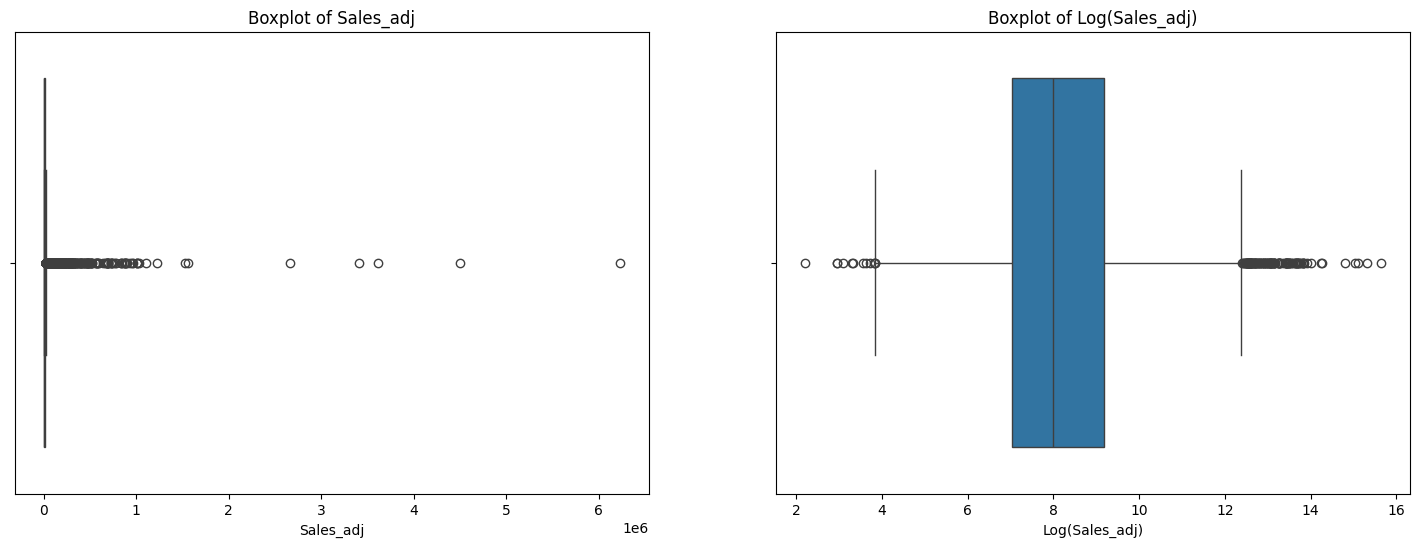

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(x=df_train["sales_adj"], ax=axes[0])
axes[0].set_title("Boxplot of Sales_adj")
axes[1].set_title("Boxplot of Log(Sales_adj)")

sns.boxplot(x=np.log(df_train["sales_adj"]), ax=axes[1])
axes[0].set_xlabel("Sales_adj")
axes[1].set_xlabel("Log(Sales_adj)")

plt.show()

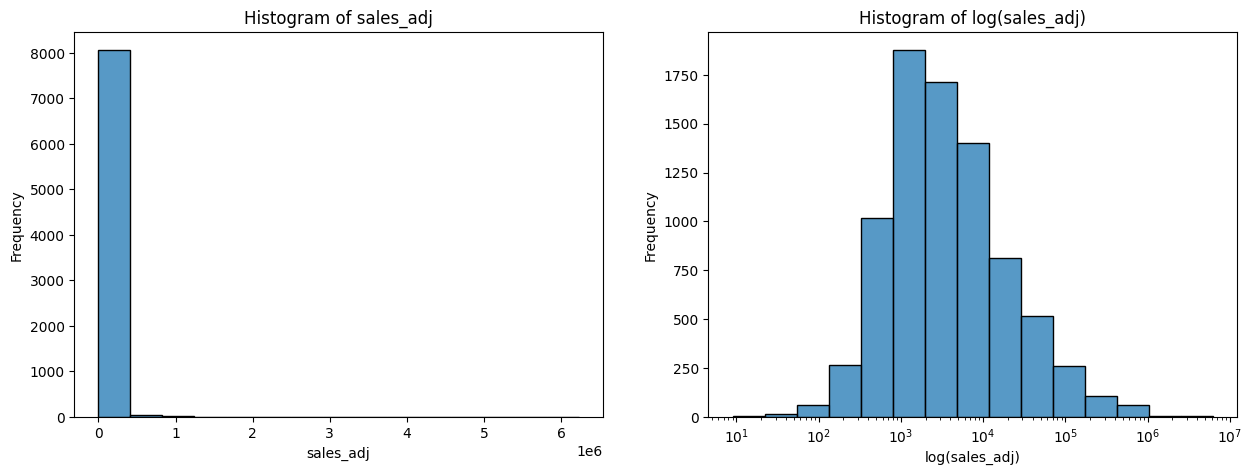

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df_train["sales_adj"], bins=15, ax=axes[0])
axes[0].set_title("Histogram of sales_adj")
axes[0].set_xlabel("sales_adj")
axes[0].set_ylabel("Frequency")

sns.histplot(data=df_train["sales_adj"], bins=15, log_scale=True, ax=axes[1])
axes[1].set_title("Histogram of log(sales_adj)")
axes[1].set_xlabel("log(sales_adj)")
axes[1].set_ylabel("Frequency")

plt.show()

#### Price

Every consumer is price conscious, there doesn't need to be any higher reason besides the fact that money is a limited resource. So those games with lower prices will likely sell well, but this is also discounting the effect of perceived value on items that are priced too low. Someone may see a game of their favorite genre that is price \\$10, but buy one that is priced $30 assuming that the \\$30 game will be better.

What we mainly want to achieve by processing and exploring price is the pruning of any outliers or erroneous data. We begin this process by taking a look at the general boxplot and histogram of price to find absolutely disproportionately priced games on the higher end going up to \\$1,000. The current accepted high-end price of a game is \\$69.99, so these points need to be looked into further.

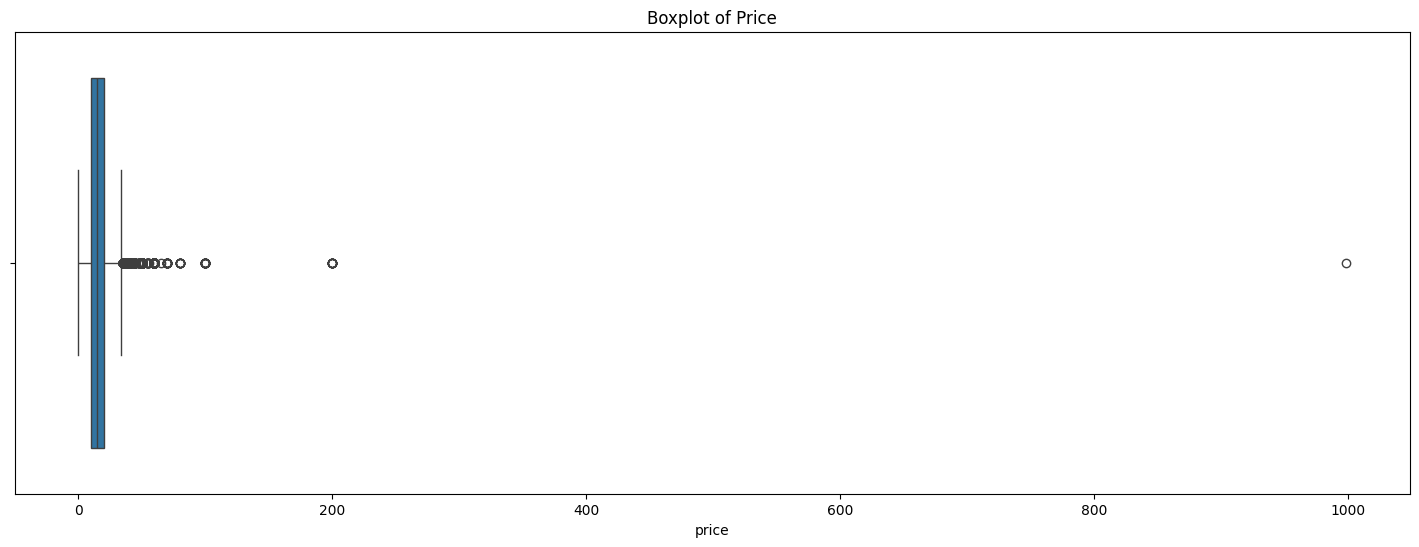

In [ ]:
fig, axes = plt.subplots(figsize=(18, 6))

sns.boxplot(x=df_train["price"], ax=axes)
axes.set_title("Boxplot of Price")

plt.show()

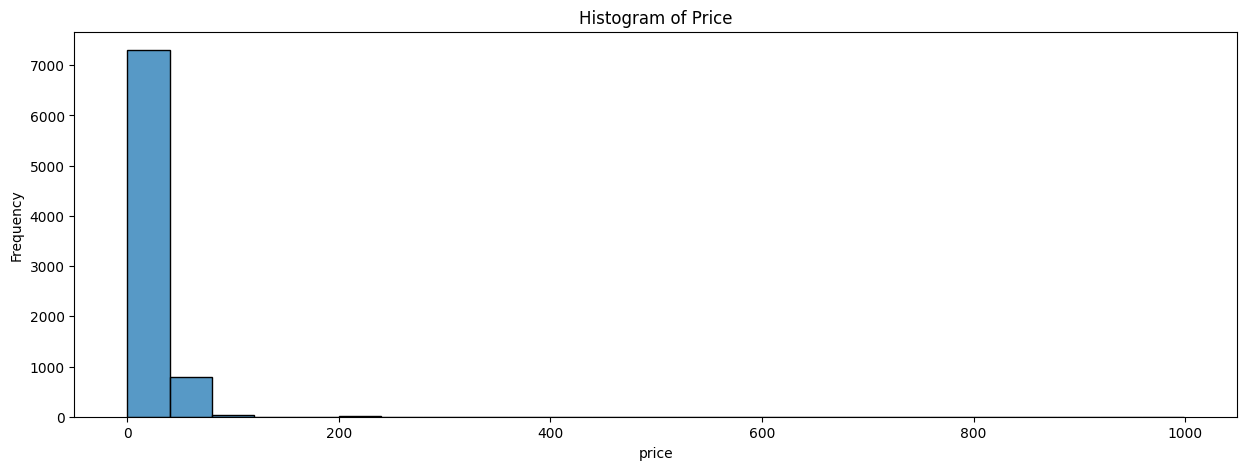

In [ ]:
fig, axes = plt.subplots(figsize=(15, 5))

sns.histplot(data=df_train["price"], bins=25, ax=axes)
axes.set_title("Histogram of Price")
axes.set_xlabel("price")
axes.set_ylabel("Frequency")

plt.show()

Manually looking through those games that are priced lower than \\$1 and greater than \\$70, we are able to see that the collected historical data once again has errors within it. Any free to play games that are priced at \\$0 should have been excluded from our api queries in the first place, but it seems like occassionally the historical data would bring back an incorrect price on the gamanalytic end. Which means it would show a paid game incorrectly as costing nothing. An example of this is shown below with the game Yakuza 0, a full priced title, shown as costing \\$0.

For the higher priced titles, these involve the correct pricing data, but those that exceed \\$150 are egregious outliers completely separated from our pricing distribution. The worst example is Ascent Free-Roaming VR Experience which is priced at \\$999.99, however the game does not have any qualities that would demand such a price differential from other games on the Steam store.

Thus we remove any points of data that are above \\$150 or are free. In total this is only a removal of 37 rows from our training data.

In [ ]:
df_train[(1 > df_train['price']) |( 70 < df_train['price'])]

,steamId,name,tags,genres,features,releaseDate,publisherClass,timeStamp,price,sales,about_the_game,img_count,link_count,timeAfterRelease,sales_adj
607,521890,Hello Neighbor,"['Horror', 'Sandbox', 'Stealth', 'First-Person...","['Adventure', 'Indie', 'Strategy']","['Single-player', 'Steam Achievements', 'Steam...",2017-12-08,AA,2018-02-01,0.00,76365,Hello Neighbor is a stealth horror game about ...,2,1,55 days,41654
840,866800,The Walking Dead: The Final Season,"['Story Rich', 'Choices Matter', 'Zombies', 'A...",['Adventure'],"['Single-player', 'Steam Achievements', 'Famil...",2018-08-13,AA,2018-09-25,0.00,77360,"Clementine, now a fierce and capable survivor,...",0,0,43 days,53972
238,775500,SCARLET NEXUS,"['Action', 'Anime', 'RPG', 'JRPG', 'Adventure'...","['Action', 'Adventure', 'RPG']","['Single-player', 'Steam Achievements', 'Steam...",2021-06-24,AA,2021-08-01,99.99,121276,"In the far distant future, a psionic hormone w...",3,0,38 days,95744
8987,1891230,Hidden Tavern Top-Down 3D,"['Action', 'Adventure', 'Casual', 'RPG', 'Simu...","['Action', 'Adventure', 'Casual', 'Indie', 'RP...","['Single-player', 'Steam Achievements', 'Steam...",2022-02-11,Indie,2022-04-01,99.99,408,Find the objects that are hidden on the map. \...,0,0,49 days,250
8672,1989190,Knight Story,"['Action', 'Adventure', 'Casual', 'RPG', 'Simu...","['Action', 'Adventure', 'Casual', 'Indie', 'RP...","['Single-player', 'Steam Achievements', 'Steam...",2022-05-18,Indie,2022-07-01,99.99,403,Black and white 2D platformer about a knight's...,0,0,44 days,275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,2610220,Hidden Space Top-Down 3D,"['Action', 'Adventure', 'Casual', 'Racing', 'R...","['Action', 'Adventure', 'Casual', 'Indie', 'Ra...","['Single-player', 'Steam Achievements', 'Steam...",2023-10-15,Indie,2023-11-16,199.99,128,Find the objects that are hidden on the map. \...,0,0,32 days,120
9148,1990310,3D PUZZLE - Castle,"['Action', 'Adventure', 'Casual', 'RPG', 'Simu...","['Action', 'Adventure', 'Casual', 'Indie', 'RP...","['Single-player', 'Steam Achievements', 'Steam...",2022-05-19,Indie,2022-07-01,99.99,330,"Collect a 3D puzzle, transferring things to th...",0,0,43 days,230
8656,1935410,The Smash Cars Tournament,"['Casual', 'Simulation', 'Racing', 'Sports', '...","['Casual', 'Indie', 'Racing', 'Simulation', 'S...","['Single-player', 'Remote Play Together', 'Fam...",2022-04-11,Hobbyist,2022-06-01,99.99,99,Welcome in The Smash Cars Tournament where you...,0,0,51 days,58
9470,1917740,The Ultimate Shot,"['Hero Shooter', ""Shoot 'Em Up"", 'Top-Down Sho...","['Action', 'Adventure', 'Casual', 'Indie', 'St...","['Single-player', 'Remote Play Together', 'Fam...",2022-03-15,Hobbyist,2022-05-01,99.99,29,The Ultimate Shot is a an action-shooter game ...,0,0,47 days,19


In [ ]:
df_train.loc[228]

steamId                                                        638970
name                                                         Yakuza 0
tags                ['Story Rich', 'Action', "Beat 'em up", 'Great...
genres                                 ['Action', 'Adventure', 'RPG']
features            ['Single-player', 'Steam Achievements', 'Steam...
releaseDate                                       2018-08-01 00:00:00
publisherClass                                                    AAA
timeStamp                                         2018-09-01 00:00:00
price                                                             0.0
sales                                                          304906
about_the_game      The glitz, glamour, and unbridled decadence of...
img_count                                                           0
link_count                                                          0
timeAfterRelease                                     31 days 00:00:00
sales_adj           

In [ ]:
df_train.loc[4603]

steamId                                                       1200520
name                                Ascent Free-Roaming VR Experience
tags                ['Action', 'Hentai', 'VR', 'Nudity', 'Sexual C...
genres                                                     ['Action']
features            ['Single-player', 'LAN Co-op', 'Tracked Contro...
releaseDate                                       2019-12-27 00:00:00
publisherClass                                                  Indie
timeStamp                                         2020-02-01 00:00:00
price                                                           999.0
sales                                                              11
about_the_game      The Ascent is a Free-Roaming highly immersive ...
img_count                                                           0
link_count                                                          0
timeAfterRelease                                     36 days 00:00:00
sales_adj           

In [ ]:
len(df_train[( 150 < df_train['price'])])

11

In [ ]:
df_train = df_train.drop(df_train[(0 == df_train['price']) |( 150 < df_train['price'])].index)
df_test = df_test.drop(df_test[(0 == df_test['price']) |( 150 < df_test['price'])].index)

Removal of the high outliers leaves our data rightward skewed and not normally distributed. Interestingly enough, even the price of $60 which is the standard price point for big game releases is considered an outlier here. This is due to the fact that there are many less big game releases compared to indie game releases on Steam. Still, we keep these points in as they are realistic indicators of possible price points for a game.

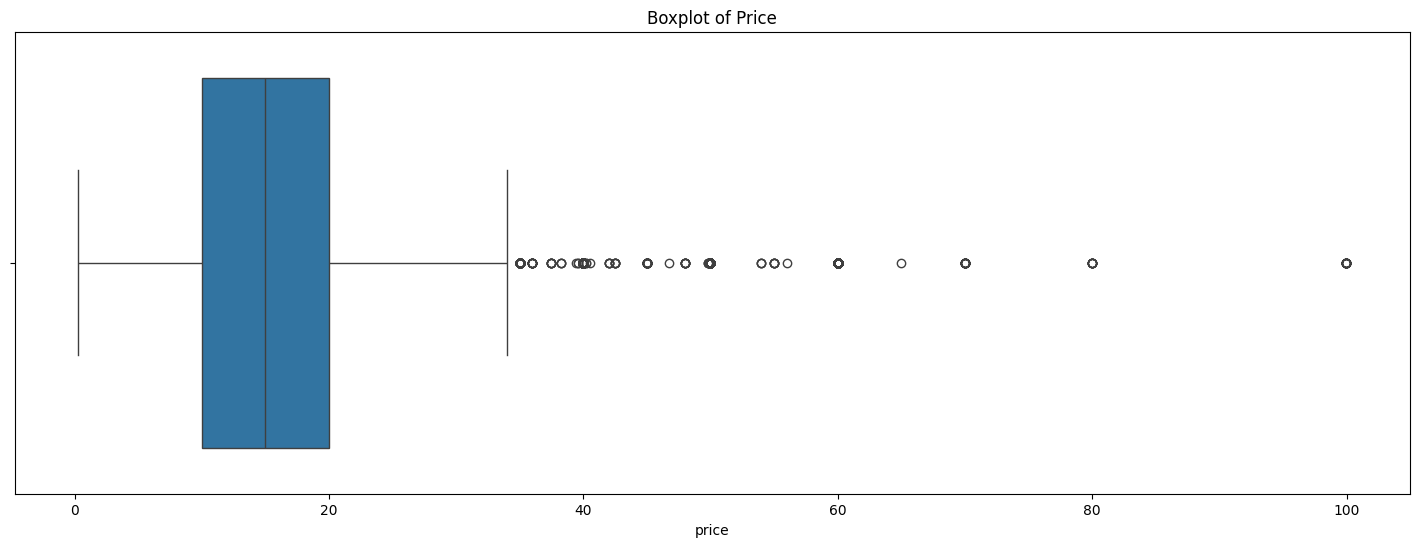

In [ ]:
fig, axes = plt.subplots(figsize=(18, 6))

sns.boxplot(x=df_train["price"], ax=axes)
axes.set_title("Boxplot of Price")

plt.show()

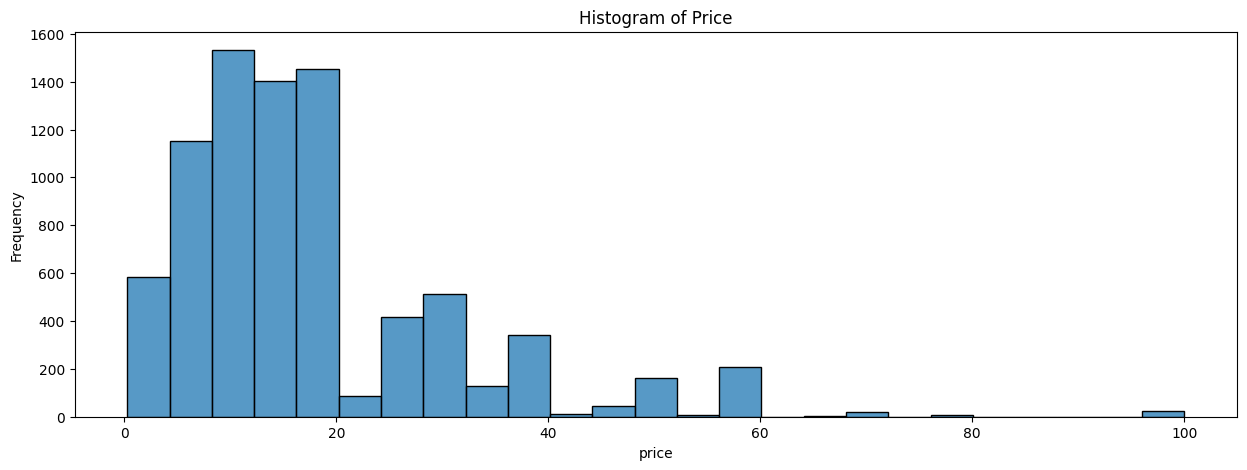

In [ ]:
fig, axes = plt.subplots(figsize=(15, 5))

sns.histplot(data=df_train["price"], bins=25, ax=axes)
axes.set_title("Histogram of Price")
axes.set_xlabel("price")
axes.set_ylabel("Frequency")

plt.show()

Interestingly enough, despite our assertion at the start of this section, it does not seem that there is a high direct correlation between the price of a game and the amount of sales, rather variation of sales tends to increase as price does from our scatterplot.

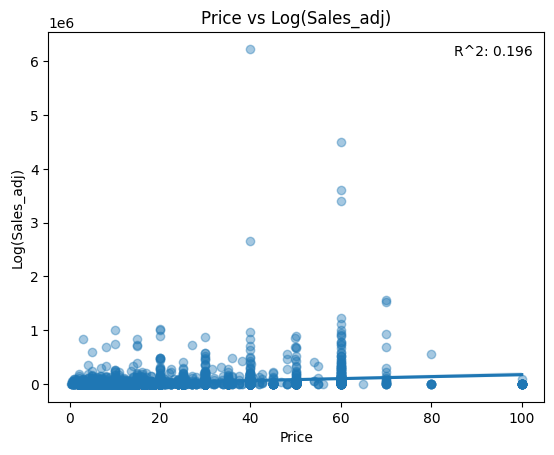

In [ ]:
sns.regplot(x="price", y="sales_adj", data=df_train, logx=False, scatter_kws={'alpha': 0.4})
plt.title('Price vs Log(Sales_adj)')
plt.xlabel('Price')
plt.ylabel('Log(Sales_adj)')

r = df_train['price'].corr(df_train['sales_adj'])
plt.text(85, 6100000, f'R^2: {r:.3f}', fontsize=10)
plt.show()

#### Image and Link Counts

The amount of images and links in your Steam description when properly placed greatly affects your game sales is commonplace "knowledge" shared among independent game developers. Thus we had previously extracted these features for our model building.

Taking a look at boxplots generated for these two features we can see that the amount of images and links embedded within a Steam description overwhelmingly tends towards the low side. The median link count in a description is none at all, while the median image count is just one. Looking at the histograms we are able to see that these features mimic a poisson distribution which should be appropiate for model building without transformation.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


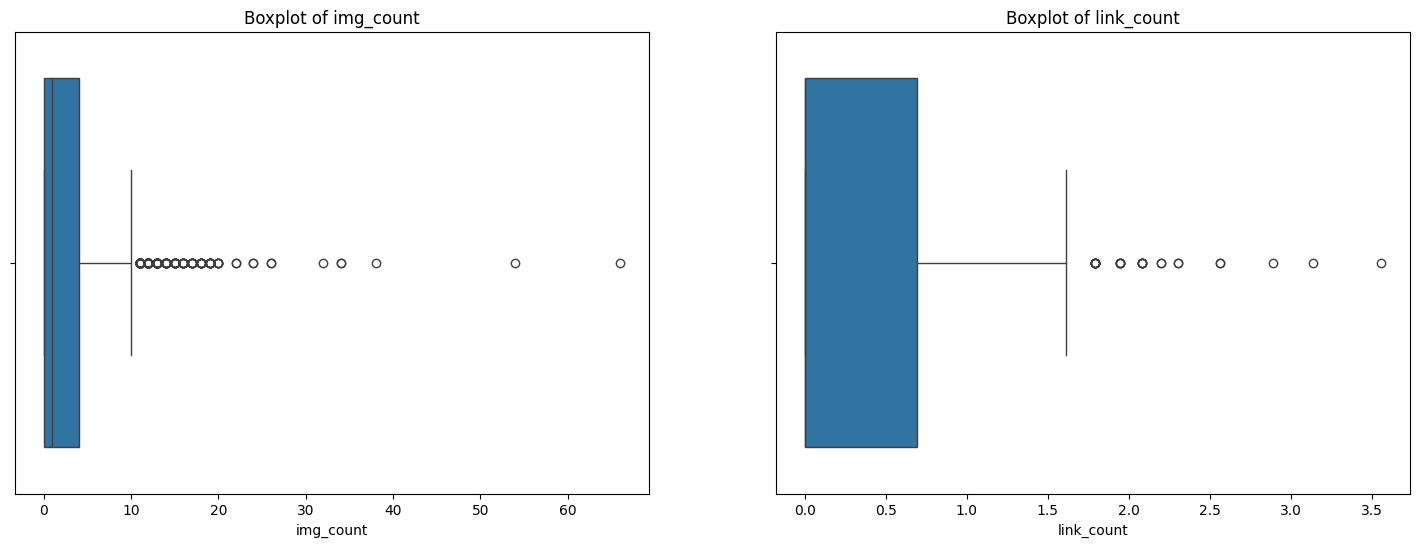

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(x=df_train["img_count"], ax=axes[0])
axes[0].set_title("Boxplot of img_count")
axes[1].set_title("Boxplot of link_count")

sns.boxplot(x=np.log(df_train["link_count"]), ax=axes[1])
axes[0].set_xlabel("img_count")
axes[1].set_xlabel("link_count")

plt.show()

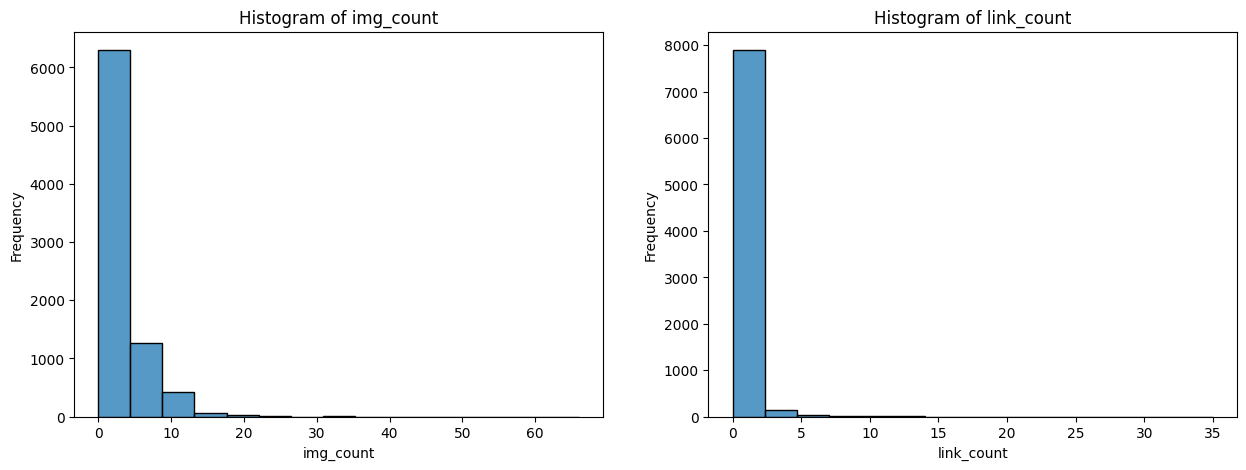

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df_train["img_count"], bins=15, ax=axes[0])
axes[0].set_title("Histogram of img_count")
axes[0].set_xlabel("img_count")
axes[0].set_ylabel("Frequency")

sns.histplot(data=df_train["link_count"], bins=15, ax=axes[1])
axes[1].set_title("Histogram of link_count")
axes[1].set_xlabel("link_count")
axes[1].set_ylabel("Frequency")

plt.show()

Unfortunately taking a look at scatterplots with a line of best fit, we see that there is close to no correlation between sales and image count for either of these features. The relationship is likely complex and would require analyzing the positioning of the image links within the description to sales, which is unfortunately not something that we are equipped to be able to do. Still, combined with other variables in a model there may be surprises with the significance of these variables.

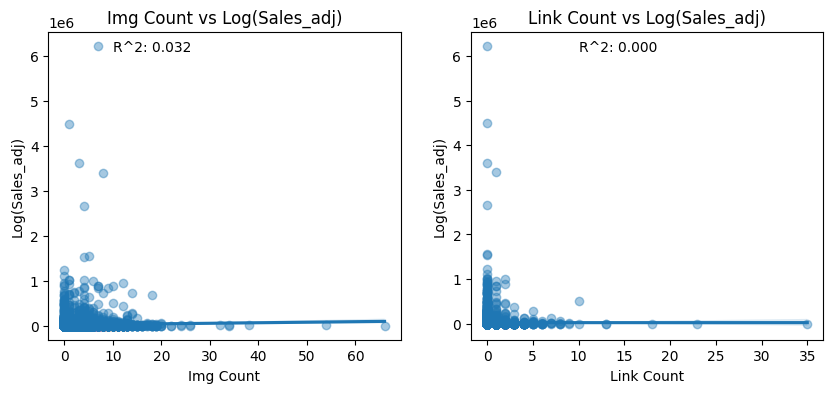

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.regplot(x="img_count", y="sales_adj", data=df_train, ax=axes[0], logx=False, scatter_kws={'alpha': 0.4})
axes[0].set_title('Img Count vs Log(Sales_adj)')
axes[0].set_xlabel('Img Count')
axes[0].set_ylabel('Log(Sales_adj)')

r1 = df_train['img_count'].corr(df_train['sales_adj'])
axes[0].text(10, 6100000, f'R^2: {r1:.3f}', fontsize=10)

sns.regplot(x="link_count", y="sales_adj", data=df_train, ax=axes[1], logx=False, scatter_kws={'alpha': 0.4})
axes[1].set_title('Link Count vs Log(Sales_adj)')
axes[1].set_xlabel('Link Count')
axes[1].set_ylabel('Log(Sales_adj)')

r2 = df_train['link_count'].corr(df_train['sales_adj'])
axes[1].text(10, 6100000, f'R^2: {r2:.3f}', fontsize=10)

plt.show()

#### Name and Description Processing

The name is going to be the first thing that someone coming to your Steam page sees. Thus, it would make sense if different features about the name caused an increase or decrease towards sales. If someone wants to dig deeper into your game because they are intrigued, then they would be looking at the description. Which in theory will also have features that lead to the potential customer deciding to either buy the gamer or not. We want to extract these potential features utilizing some simple string processing.




##### Name

From our name we will extract five different features:
1.   The length of the name which could increase sales when it is shorter due to being able to read and recommend more easily
2.   The capital letter ratio which may draw increased attention if it is larger
3.   The digit to letter ratio which may decrease sales if it is larger due to having more numbers leading to a more complex name
4.   The special symbol to letter ratio which may decrease sales if it is larger due to having more symbols leading to a more complex name
5.   The word count in the name could increase sales when it is shorter due to being able to read and recommend more easily like the total length

In [ ]:
df_train['name_len'] = df_train['name'].apply(lambda x: len(x))
df_train['name_capital_ratio'] = df_train['name'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x))
df_train['name_digit_ratio'] = df_train['name'].apply(lambda x: sum(1 for c in x if c.isdigit()) / len(x))
df_train['name_special_ratio'] = df_train['name'].apply(lambda x: sum(1 for c in x if not c.isalnum()) / len(x))
df_train['name_word_count'] = df_train['name'].apply(lambda x: len(x.split()))

In [ ]:
df_test['name_len'] = df_test['name'].apply(lambda x: len(x))
df_test['name_capital_ratio'] = df_test['name'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x))
df_test['name_digit_ratio'] = df_test['name'].apply(lambda x: sum(1 for c in x if c.isdigit()) / len(x))
df_test['name_special_ratio'] = df_test['name'].apply(lambda x: sum(1 for c in x if not c.isalnum()) / len(x))
df_test['name_word_count'] = df_test['name'].apply(lambda x: len(x.split()))

We then take a look at how applicable these new variables might be to our model by correlating them with adjusted sales. Unfortunately, once more, we have extremely weak correlation in each case against sales_adj. One thing to note is that the length of the name in total seems to have slightly more of an affect on adjusted sales while being highly cocorrelated to the word count of a name. Thus we will drop the word count of the name variable.

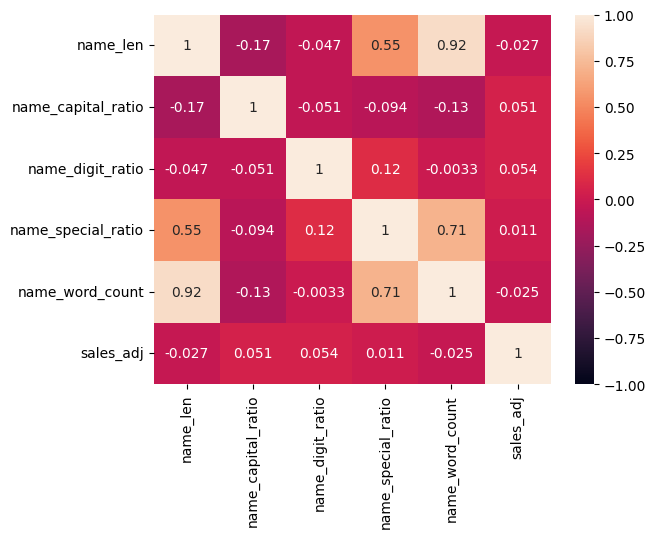

In [ ]:
df_train_corr = df_train[['name_len', 'name_capital_ratio', 'name_digit_ratio', 'name_special_ratio', 'name_word_count', 'sales_adj']]

corr_matrix = df_train_corr.corr()

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

In [ ]:
df_train = df_train.drop('name_word_count', axis=1)
df_test = df_test.drop('name_word_count', axis=1)

##### Description

Before we process the description column further we have noticed from previous skimming of our data that there are NA values present within the descriptions. We want to inspect these NA values to determine if they provide us with information or not. Such as if they are games that don't actually have a description which would also provide us insight as a feature to model with, determining if that has an impact on sales.

In [ ]:
len(df_train[df_train['about_the_game'].isna()])

17

Manually sorting through the descriptions we are able to determine that the games which do not have an entry under the about_the_game field are not games without a description on their Steam page. As a direct example, the game Aokana - Four Rhythms Across the Blue, has no description information when retrieved from the Steam API, but does have a description on the game page itself. These games have their description uploaded as images instead, which is why img_count which was extracted from the description html is still available. Unfortunately, we are limited in our capabilities to extract these images and analyze the text on them. Thus, we will delete the few samples that have an image-based description.

In [ ]:
df_train.loc[1034]

steamId                                                         1044620
name                              Aokana - Four Rhythms Across the Blue
tags                  ['Visual Novel', 'Anime', 'Casual', 'Adventure...
genres                                          ['Adventure', 'Casual']
features              ['Single-player', 'Steam Achievements', 'Steam...
releaseDate                                         2019-09-27 00:00:00
publisherClass                                                    Indie
timeStamp                                           2019-10-28 00:00:00
price                                                             31.49
sales                                                              8086
about_the_game                                                      NaN
img_count                                                             3
link_count                                                            0
timeAfterRelease                                       31 days 0

In [ ]:
df_train = df_train.drop(df_train[df_train['about_the_game'].isna()].index)
df_test = df_test.drop(df_test[df_test['about_the_game'].isna()].index)

After removing the missing values from within the descriptions we begin to further process the descriptions into the following fields:
1.   The length of the description which could increase sales when it is larger due to having more information provded about the game.
2.   The capital letter ratio which may draw increased attention if it is larger.
3.   The digit to letter ratio which may increase sales if it is larger due to having more numbers such as the amount of playtime or amount of characters leading to more information that a potential customer would want to see.
4.   The special symbol to letter ratio which may decrease sales if it is larger due to having more symbols leading to a harder time for the user reading the description.
5.   The word count in the name could increase sales when it is larger due to having more information provided about the game like the total length.
6.   The stopword ratio could increase sales when it is smaller due to having more information provided in the description per word.
7.   The average word length could increase sales when it is smaller due to having more information provided in the description per word like the stopword ratio.

In [ ]:
df_train['description_len'] = df_train['about_the_game'].apply(lambda x: len(x))
df_train['description_capital_ratio'] = df_train['about_the_game'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x))
df_train['description_digit_ratio'] = df_train['about_the_game'].apply(lambda x: sum(1 for c in x if c.isdigit()) / len(x))
df_train['description_special_ratio'] = df_train['about_the_game'].apply(lambda x: sum(1 for c in x if not c.isalnum()) / len(x))
df_train['description_word_count'] = df_train['about_the_game'].apply(lambda x: len(x.split()))
df_train['description_stopword_ratio'] = df_train['about_the_game'].apply(lambda x: len([word for word in x.split() if word in stopwords.words('english')]) / len(x.split()))
df_train['description_avg_word_len'] = df_train['about_the_game'].apply(lambda x: np.mean([len(word) for word in x.split()]))

In [ ]:
df_test['description_len'] = df_test['about_the_game'].apply(lambda x: len(x))
df_test['description_capital_ratio'] = df_test['about_the_game'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x))
df_test['description_digit_ratio'] = df_test['about_the_game'].apply(lambda x: sum(1 for c in x if c.isdigit()) / len(x))
df_test['description_special_ratio'] = df_test['about_the_game'].apply(lambda x: sum(1 for c in x if not c.isalnum()) / len(x))
df_test['description_word_count'] = df_test['about_the_game'].apply(lambda x: len(x.split()))
df_test['description_stopword_ratio'] = df_test['about_the_game'].apply(lambda x: len([word for word in x.split() if word in stopwords.words('english')]) / len(x.split()))
df_test['description_avg_word_len'] = df_test['about_the_game'].apply(lambda x: np.mean([len(word) for word in x.split()]))

The correlation between sales and the description features seems to be extremely low even compared to the correlation between the name features and adjusted sales. The highest correlation is just 0.047 between adjusted sales and the capital ratio of the description. Since the data contained within the description can be processed an extreme amount of ways, it makes sense that our simple processing doesn't have high correlation out of the gate. Since our model will take advantage of the combination of features, these might still be useful. The one exception is description word count which has an almost perfect cocorrelation with description length at 0.99, but since it has lower correlation with adjusted sales we drop the variable.

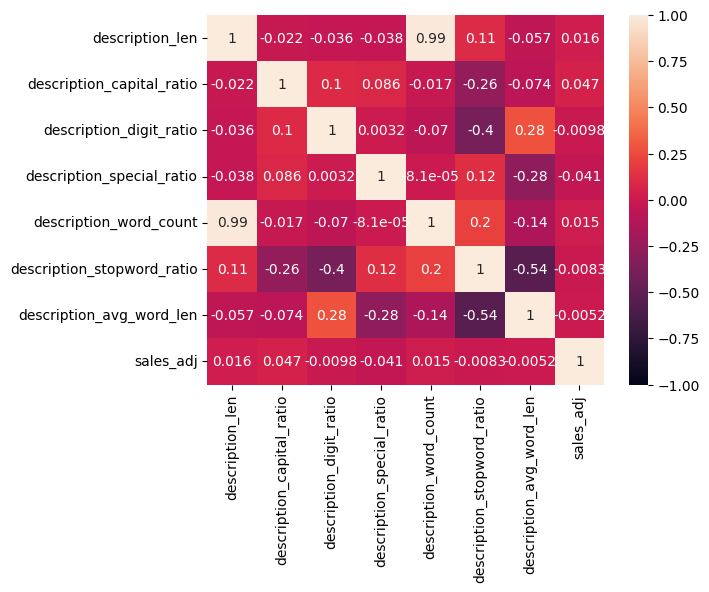

In [ ]:
df_train_corr = df_train[['description_len', 'description_capital_ratio', 'description_digit_ratio', 'description_special_ratio', 'description_word_count', 'description_stopword_ratio','description_avg_word_len','sales_adj']]

corr_matrix = df_train_corr.corr()

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

In [ ]:
df_train = df_train.drop('description_word_count', axis=1)
df_test = df_test.drop('description_word_count', axis=1)

#### Publisher Class

The class of publisher is a variable that will likely have a high effect on game sales. As consumer trust and awareness of developers grow as their publisher class does as well. A consumer will be more likely to purchase something from someone that they have either heard of or played a game from before. We believe this variable will be best used to fix effects of class into place, since changing your publisher class is not something a developer can simply due. However, the effects should be accounted for in the model.

First, we find the amount of each type of publisher class within our data to ensure that each class has sufficient samples to build a model against. The hobbyist segment of the publisher class surprisingly is the smallest value with only thirty examples within our training data. This is less than half a percent of the total sample size. Thus, this class is degenerate and not usable for modeling. So we drop the samples from the hobbyist class.

In [ ]:
df_train.groupby('publisherClass')['publisherClass'].count()

publisherClass
AA          1087
AAA          314
Hobbyist      30
Indie       6645
Name: publisherClass, dtype: int64

In [ ]:
df_train = df_train.drop(df_train[df_train['publisherClass'] == 'Hobbyist'].index)
df_test = df_test.drop(df_test[df_test['publisherClass'] == 'Hobbyist'].index)

Next we take a look at a boxplot of publisher class against adjusted sales to determine how exactly the publisher class may influences sales. Like we had suggested before, the higher the class of publisher, the greater both the median sales and each percentile range. While independent and AA publishers may have occassional big hits, they are considered as outliers by going beyond 1.5*IQR. Ideally, integrating publisher class into our model may tell us what leads to those outliers to have sales shift higher for independent developers.

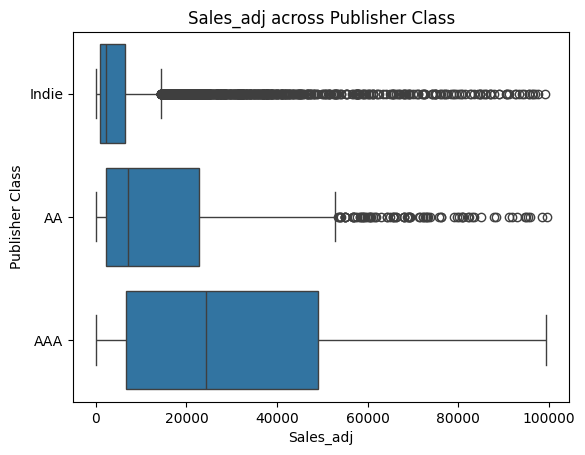

In [ ]:
df_train
sns.boxplot(x = df_train[df_train['sales_adj']<100000]['sales_adj'], y=df_train[df_train['sales_adj']<100000]['publisherClass'], orient="h")
plt.title('Sales_adj across Publisher Class')
plt.xlabel('Sales_adj')
plt.ylabel('Publisher Class')
plt.show()

Finally, we change the publisher class to a categorical variable so it is able to be fit into a model.

In [ ]:
df_test['publisherClass'] = df_train['publisherClass'].astype('category')
df_test['publisherClass'] = df_test['publisherClass'].astype('category')

#### Tags, Genres, and Features

Our final step of processing and exploring the data will focus on array variables that will be converted to dummy variables. These include the user-applied tags on a game, the developer-applied genres, and the developer-applied features.

The first part involves turning these variables from strings to arrays by evaluating them as python objects. Then we take only the first five of the tags and genres to limit the dummy variables for these to the most important and relevant ones. The features are not limited as they are not assigned in any order of importance.

In [ ]:
df_train['tags'] = df_train['tags'].apply(lambda x: eval(x)).apply(lambda x: x[:5])
df_test['tags'] = df_test['tags'].apply(lambda x: eval(x)).apply(lambda x: x[:5])

df_train['genres'] = df_train['genres'].apply(lambda x: eval(x)).apply(lambda x: x[:5])
df_test['genres'] = df_test['genres'].apply(lambda x: eval(x)).apply(lambda x: x[:5])

df_train['features'] = df_train['features'].apply(lambda x: eval(x))
df_test['features'] = df_test['features'].apply(lambda x: eval(x))

The next step to process these arrays is extracting only those of each variable which appear at least ten times throughout their column and are within the top 30 most popular of their column. By having a threshold of at least ten counts, we ensure that a feature or tag that only a few games might have does not skew the importance of the variable. We keep only 30 of each variable to maintain some semblance of parsimony for interpretation of the model down the line. Less variables will also mean less processing power required for model building.

In [ ]:
tag_counts = {}
for tags_list in df_train['tags']:
    for tag in tags_list:
        if tag not in tag_counts:
            tag_counts[tag] = 1
        else:
            tag_counts[tag] += 1

sorted_tag_counts = sorted(tag_counts.items(), key=lambda item: item[1], reverse=True)

top_30_tags = [tag for tag, count in sorted_tag_counts[:30] if count > 10]

df_train['tags'] = df_train['tags'].apply(lambda tags_list: [tag for tag in tags_list if tag in top_30_tags])
df_test['tags'] = df_test['tags'].apply(lambda tags_list: [tag for tag in tags_list if tag in top_30_tags])

In [ ]:
genre_counts = {}
for genre_list in df_train['genres']:
    for genre in genre_list:
        if genre not in genre_counts:
            genre_counts[genre] = 1
        else:
            genre_counts[genre] += 1

sorted_genre_counts = sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)

top_30_genres = [genre for genre, count in sorted_genre_counts[:30] if count > 10]

df_train['genres'] = df_train['genres'].apply(lambda genre_list: [genre for genre in genre_list if genre in top_30_genres])
df_test['genres'] = df_test['genres'].apply(lambda genre_list: [genre for genre in genre_list if genre in top_30_genres])

In [ ]:
feature_counts = {}
for feature_list in df_train['features']:
    for feature in feature_list:
        if feature not in feature_counts:
            feature_counts[feature] = 1
        else:
            feature_counts[feature] += 1

sorted_feature_counts = sorted(feature_counts.items(), key=lambda item: item[1], reverse=True)

top_30_features = [feature for feature, count in sorted_feature_counts[:30] if count > 10]

df_train['features'] = df_train['features'].apply(lambda feature_list: [feature for feature in feature_list if feature in top_30_features])
df_test['features'] = df_test['features'].apply(lambda feature_list: [feature for feature in feature_list if feature in top_30_features])

Finally, we create dummy variables for each of these array variables that will indicate the presence of a certain genre, tag, or feature for a game. This leaves us with 96 different variables total.

In [ ]:
for x in ['tags','genres','features']:
  df = pd.get_dummies(df_train[x].explode(), prefix = x).groupby(level=0).sum()
  df_train = pd.merge(left = df_train, right = df, left_index = True, right_index = True)

In [ ]:
for x in ['tags','genres','features']:
  df = pd.get_dummies(df_test[x].explode(), prefix = x).groupby(level=0).sum()
  df_test = pd.merge(left = df_test, right = df, left_index = True, right_index = True)

In [ ]:
df_train.shape

(8046, 89)

#### Cleanup and Last Look

With all of our columns processed and new columns added, we want to remove columns that are no longer needed for model building. This includes intermediary columns that had data which we processed out such the array columns or the description. Additionally, automatically adding dummy variable names had introduced some spaces and special characters into our column names. Typically these don't interact the best with model building, thus we remove them.

In [ ]:
remove = ['tags','genres','features','releaseDate','timeStamp','about_the_game','timeAfterRelease']
df_train = df_train.drop(remove, axis = 1)
df_train.columns = df_train.columns.str.replace('&', '').str.replace(' ', '_').str.replace('/', '').str.replace('-', '')

In [ ]:
df_test = df_test.drop(remove, axis = 1)
df_test.columns = df_test.columns.str.replace('&', '').str.replace(' ', '_').str.replace('/', '').str.replace('-', '')

We take one last skim of our final training dataframe to make sure we did not miss anything or some of our changes did not apply. Everything ends up looking good.

In [ ]:
skim(df_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8046   │ │ int64       │ 78    │                                                          │
│ │ Number of columns │ 89     │ │ float64     │ 9     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA ┃ NA % ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ steamId              │  0 │    0 │ 1100000 │ 630000 │ 17000 │ 550000 │ 970000 │ 1500000 │ 2900000 │ ▆▇▆▅▂▁ │  │
│ │ price                │  0 │    0 │      18 │     14 │  0.29 │     10 │     15 │      20 │     100 │  ▇▅▁   │  │
│ │ sales                │  0 │    0 │   29000 │ 160000 │     0 │   1600 │   3900 │   13000 │ 6600000 │   ▇    │  │
│ │ img_count            │  0 │    0 │     2.6 │    3.5 │     0 │      0 │      1 │       4 │      66 │   ▇    │  │
│ │ link_count           │  0 │    0 │    0.28 │   0.93 │     0 │      0 │      0 │       0 │      35 │   ▇    │  │
│ │ sales_adj            │  0 │    0 │   22000 │ 130000 │     0 │   1100 │   3000 │    9600 │ 6200000 │   ▇    │  │
│ │ name_len             │  0 │    0 │      20 │     11 │     2 │     12 │     17 │      26 │     180 │   ▇▁   │  │
│ │ name_capital_ratio   │  0 │    0 │    0.21 │    0.2 │     0 │   0.12 │   0.15 │     0.2 │       1 │ ▇▅   ▁ │  │
│ │ name_digit_ratio     │  0 │    0 │   0.013 │  0.045 │     0 │      0 │      0 │       0 │       1 │   ▇    │  │
│ │ name_special_ratio   │  0 │    0 │    0.12 │  0.068 │     0 │  0.077 │   0.12 │    0.17 │     0.5 │  ▅▇▅   │  │
│ │ description_len      │  0 │    0 │    1700 │   1100 │    22 │    980 │   1400 │    2000 │   17000 │   ▇▁   │  │
│ │ description_capital_ │  0 │    0 │   0.036 │  0.027 │     0 │  0.021 │  0.029 │   0.041 │     0.8 │   ▇    │  │
│ │ ratio                │    │      │         │        │       │        │        │         │         │        │  │
│ │ description_digit_ra │  0 │    0 │  0.0042 │ 0.0063 │     0 │      0 │ 0.0025 │  0.0057 │    0.16 │   ▇    │  │
│ │ tio                  │    │      │         │        │       │        │        │         │         │        │  │
│ │ description_special_ │  0 │    0 │     0.2 │  0.021 │ 0.074 │   0.19 │    0.2 │    0.21 │    0.54 │    ▇   │  │
│ │ ratio                │    │      │         │        │       │        │        │         │         │        │  │
│ │ description_stopword │  0 │    0 │    0.35 │  0.068 │     0 │   0.32 │   0.36 │    0.39 │    0.55 │   ▁▇▇  │  │
│ │ _ratio               │    │      │         │        │       │        │        │         │         │        │  │
│ │ description_avg_word │  0 │    0 │     5.6 │    4.5 │   3.4 │    4.9 │    5.1 │     5.3 │     150 │   ▇    │  │
│ │ _len                 │    │      │         │        │       │        │        │         │         │        │  │
│ │ tags_2D              │  0 │    0 │   0.046 │   0.21 

In [71]:
#Saving midpoint
df_train.to_csv(f'{drive}/dftrain.csv')
df_test.to_csv(f'{drive}/dftest.csv')

In [58]:
#Loading midpoint
df_train = pd.read_csv(f'https://github.com/abnormalPotassium/SteamSalesModeling/raw/main/Data/dftrain.csv', index_col=0)
df_test = pd.read_csv(f'https://github.com/abnormalPotassium/SteamSalesModeling/raw/main/Data/dftest.csv', index_col=0)

### Model Building and Selection

#### OLS Model

We begin our model building journey with a quick and dirty ordinary least squares model to see where we are right out of the gate without any additional variable manipulation. It turns out, that with an adjusted R^2 of 0.157, we're far off from a model that we'd like to see.

In [60]:
mcols = list(df_train.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1).columns)
mcols_str = " + ".join(mcols)

In [61]:
results = smf.ols(f'sales_adj ~ {mcols_str}', data=df_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sales_adj   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     18.78
Date:                Wed, 15 May 2024   Prob (F-statistic):          4.28e-247
Time:                        05:37:48   Log-Likelihood:            -1.0542e+05
No. Observations:                8046   AIC:                         2.110e+05
Df Residuals:                    7961   BIC:                         2.116e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            1.224e+05   2.61e+04      4.695      0.000    7.13e+04    1.74e+05
price                                1144.9360    123.068      9.303      0.000     903.690    1386.182
img_count                             929.6362    419.063      2.218      0.027     108.162    1751.110
link_count                           1301.3358   1492.377      0.872      0.383   -1624.114    4226.785
name_len                             -387.7045    151.896     -2.552      0.011    -685.460     -89.949
name_capital_ratio                   1.535e+04   7309.315      2.100      0.036    1018.542    2.97e+04
name_digit_ratio                     1.057e+05   3.19e+04      3.310      0.001    4.31e+04    1.68e+05
name_special_ratio                  -3242.6688   2.41e+04     -0.135      0.893   -5.04e+04    4.39e+04
description_len                        -2.6018      1.343     -1.937      0.053      -5.235       0.032
description_capital_ratio            7.272e+04   5.51e+04      1.319      0.187   -3.53e+04    1.81e+05
description_digit_ratio             -7.884e+04   2.42e+05     -0.326      0.744   -5.53e+05    3.95e+05
description_special_ratio           -8.753e+04   7.07e+04     -1.238      0.216   -2.26e+05     5.1e+04
description_stopword_ratio          -3776.8889   2.65e+04     -0.143      0.887   -5.57e+04    4.81e+04
description_avg_word_len             -110.8120    388.385     -0.285      0.775    -872.147     650.523
tags_2D                               622.7588   6537.644      0.095      0.924   -1.22e+04    1.34e+04
tags_Action                         -1.282e+04   4704.671     -2.724      0.006    -2.2e+04   -3593.092
tags_Adventure                        376.2706   4165.978      0.090      0.928   -7790.138    8542.679
tags_Anime                          -8840.4603   5354.063     -1.651      0.099   -1.93e+04    1654.906
tags_Atmospheric                    -3527.5007   7237.428     -0.487      0.626   -1.77e+04    1.07e+04
tags_Casual                          5229.3637   4989.292      1.048      0.295   -4550.957     1.5e+04
tags_Cute                            2464.6553   7282.847      0.338      0.735   -1.18e+04    1.67e+04
tags_Exploration                    -1.331e+04   6254.725     -2.128      0.033   -2.56e+04   -1050.643
tags_Female_Protagonist             -6724.8379   5558.238     -1.210      0.226   -1.76e+04    4170.765
tags_FirstPerson                     4197.0024   8079.272      0.519      0.603   -1.16e+04       2e+04
tags_Horror                          2202.5378   6220.920      0.354      0.723   -9992.095    1.44e+04
tags_Indie                           -525.4306   3764.260     -0.140      0.889   -7904.367    6853.505
tags_JRPG                           -1.905e+04   7451.066     -2.55

Looking through the significance of the coefficients within the model, we see that only about 1/4 of our features provide any significant information. Thus, the next logical step to improve the OLS model would commencing

In [62]:
pvalues = results.pvalues.loc[results.pvalues < 0.05].sort_values()
coefficients = results.params.loc[results.pvalues < 0.05]
features = pvalues.index.tolist()
for i in range(len(features)):
    print(f"Feature: {features[i]}, Coefficient: {coefficients[i]}, p-value: {pvalues[i]}")

Feature: features_HDR_available, Coefficient: 122421.33714719886, p-value: 1.1100749598210019e-52
Feature: features_InApp_Purchases, Coefficient: 1144.9360184851344, p-value: 1.2710836946300757e-29
Feature: tags_Open_World, Coefficient: 929.6361807172929, p-value: 5.607014789836647e-22
Feature: price, Coefficient: -387.70446592541646, p-value: 1.7295970950813173e-20
Feature: features_Online_Coop, Coefficient: 15346.7147458947, p-value: 1.058217279398299e-10
Feature: features_Singleplayer, Coefficient: 105663.16284996389, p-value: 6.1375686904326e-09
Feature: features_Remote_Play_on_Tablet, Coefficient: -12815.479869370602, p-value: 1.4088862397674501e-08
Feature: Intercept, Coefficient: -13311.54145969256, p-value: 2.705328351957681e-06
Feature: name_digit_ratio, Coefficient: -19049.67396665161, p-value: 0.0009386824086583571
Feature: tags_Multiplayer, Coefficient: 21934.869609894267, p-value: 0.001140388354689902
Feature: features_Family_Sharing, Coefficient: 76930.72319290445, p-valu

We create a function that iterates upon a model with no features and only selects features that have a pvalue of greater than 0.05, our threshold indicator for a significant feature.

In [63]:
def stepwise_selection(X, y):

    selected_features = []

    for feature in X.columns:

        if feature not in selected_features:
            new_features = selected_features + [feature]
            model = smf.ols(f'y ~ {" + ".join(new_features)}', data=df_train).fit()

            pvalue = model.pvalues[feature]

            if pvalue < 0.05:
                selected_features.append(feature)

    return pd.DataFrame({'feature': selected_features, 'pvalue': model.pvalues[selected_features]})

selected_features = stepwise_selection(df_train[mcols], df_train['sales_adj'])

print(selected_features)

                                                             feature  \
price                                                          price   
img_count                                                  img_count   
name_len                                                    name_len   
name_digit_ratio                                    name_digit_ratio   
description_len                                      description_len   
description_capital_ratio                  description_capital_ratio   
description_special_ratio                  description_special_ratio   
tags_Adventure                                        tags_Adventure   
tags_Anime                                                tags_Anime   
tags_Indie                                                tags_Indie   
tags_JRPG                                                  tags_JRPG   
tags_Multiplayer                                    tags_Multiplayer   
tags_Open_World                                      tags_Open_W

Unfortunately, even with a restricted amount of features that are all significant on there own, we end up with a model with 32 variables but a decrease in the R^2 by 0.001. Since our variables did decrease by 51, this is an improvement on the previous model, but we want to make our model a good fit.

In [64]:
mcols = list(selected_features['feature'])
mcols_str = " + ".join(mcols)
results = smf.ols(f'sales_adj ~ {mcols_str}', data=df_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sales_adj   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     45.96
Date:                Wed, 15 May 2024   Prob (F-statistic):          1.47e-271
Time:                        05:38:00   Log-Likelihood:            -1.0545e+05
No. Observations:                8046   AIC:                         2.110e+05
Df Residuals:                    8012   BIC:                         2.112e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          1.133e+05    2.2e+04      5.147      0.000    7.02e+04    1.57e+05
price                              1175.1301    114.159     10.294      0.000     951.348    1398.912
img_count                           929.8857    405.671      2.292      0.022     134.665    1725.107
name_len                           -434.0316    123.718     -3.508      0.000    -676.551    -191.513
name_digit_ratio                   9.828e+04    3.1e+04      3.174      0.002    3.76e+04    1.59e+05
description_len                      -2.5172      1.300     -1.937      0.053      -5.065       0.030
description_capital_ratio            9.8e+04   5.04e+04      1.944      0.052    -828.731    1.97e+05
description_special_ratio         -7.896e+04   6.64e+04     -1.188      0.235   -2.09e+05    5.13e+04
tags_Adventure                    -6114.7193   3076.322     -1.988      0.047   -1.21e+04     -84.327
tags_Anime                        -7781.2830   4918.997     -1.582      0.114   -1.74e+04    1861.231
tags_Indie                        -2788.7544   3146.036     -0.886      0.375   -8955.804    3378.295
tags_JRPG                         -1.498e+04   7226.341     -2.073      0.038   -2.91e+04    -818.111
tags_Multiplayer                   2.281e+04   6663.419      3.423      0.001    9743.888    3.59e+04
tags_Open_World                    7.571e+04   7789.972      9.719      0.000    6.04e+04     9.1e+04
tags_RPG                           7118.2454   3919.964      1.816      0.069    -565.904    1.48e+04
tags_Simulation                   -5943.8067   3860.531     -1.540      0.124   -1.35e+04    1623.839
tags_Singleplayer                  1.799e+04   4975.898      3.616      0.000    8240.291    2.77e+04
tags_Sports                       -1.814e+04   7476.617     -2.427      0.015   -3.28e+04   -3486.967
tags_VR                           -1.146e+04   6483.704     -1.767      0.077   -2.42e+04    1253.388
genres_Racing                     -1.306e+04   8140.184     -1.604      0.109    -2.9e+04    2898.508
features_Family_Sharing           -4.565e+04   1.38e+04     -3.308      0.001   -7.27e+04   -1.86e+04
features_HDR_available             3.202e+05   2.08e+04     15.393      0.000    2.79e+05    3.61e+05
features_InApp_Purchases           1.346e+05   1.21e+04     11.089      0.000    1.11e+05    1.58e+05
features_LAN_Coop                  2.841e+04    1.7e+04      1.672      0.095   -4899.649    6.17e+04
features_Online_Coop               4.068e+04   6183.214      6.580      0.000    2.86e+04    5.28e+04
features_Online_PvP               -2.045e+04   5557.022     -3.680      0.000   -3.13e+04   -9554.213
features_Profile_Features_Limited -1.931e+04   9233.496     -2.091      0.037   -3.74e+04   -1207.329
features_Remote_Play_To

In order to see what we can do to improve our OLS model, we take a look at the diagnostic graphs for residuals. Looking at a residuals vs fitted graph allows us to see that there seems to be heavy heteroskedasicity in the model. Our QQ plot distribution also looks nothing close to normal. This indicates that our current model is not appropriately extracting all the information it can from our data.

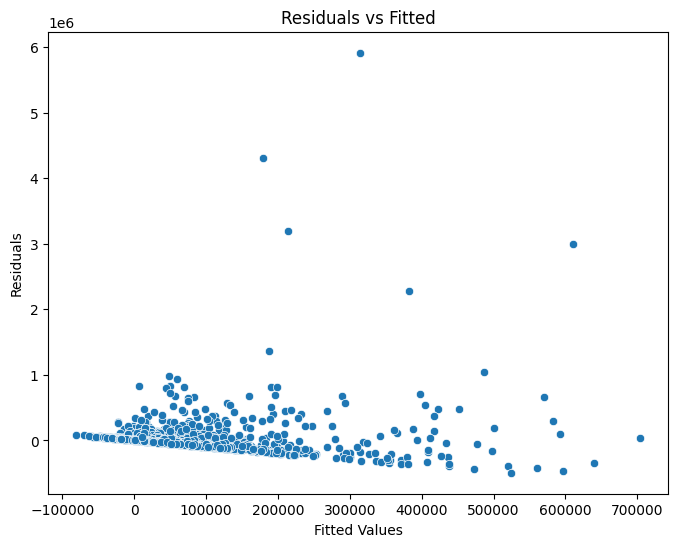

In [65]:
plt.rc("figure", figsize=(8,6))
sns.scatterplot(x=results.fittedvalues, y=results.resid)
plt.title('Residuals vs Fitted')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.show()

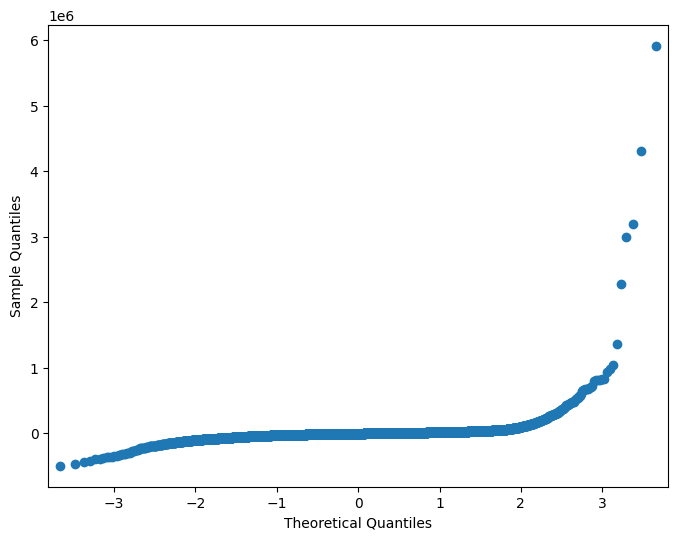

In [66]:
sm.qqplot(results.resid)
plt.show()

Taking a look at partial residual plots for each variable also shows us that for most of the categories, our residuals are evenly distributed but heteroskedastic.

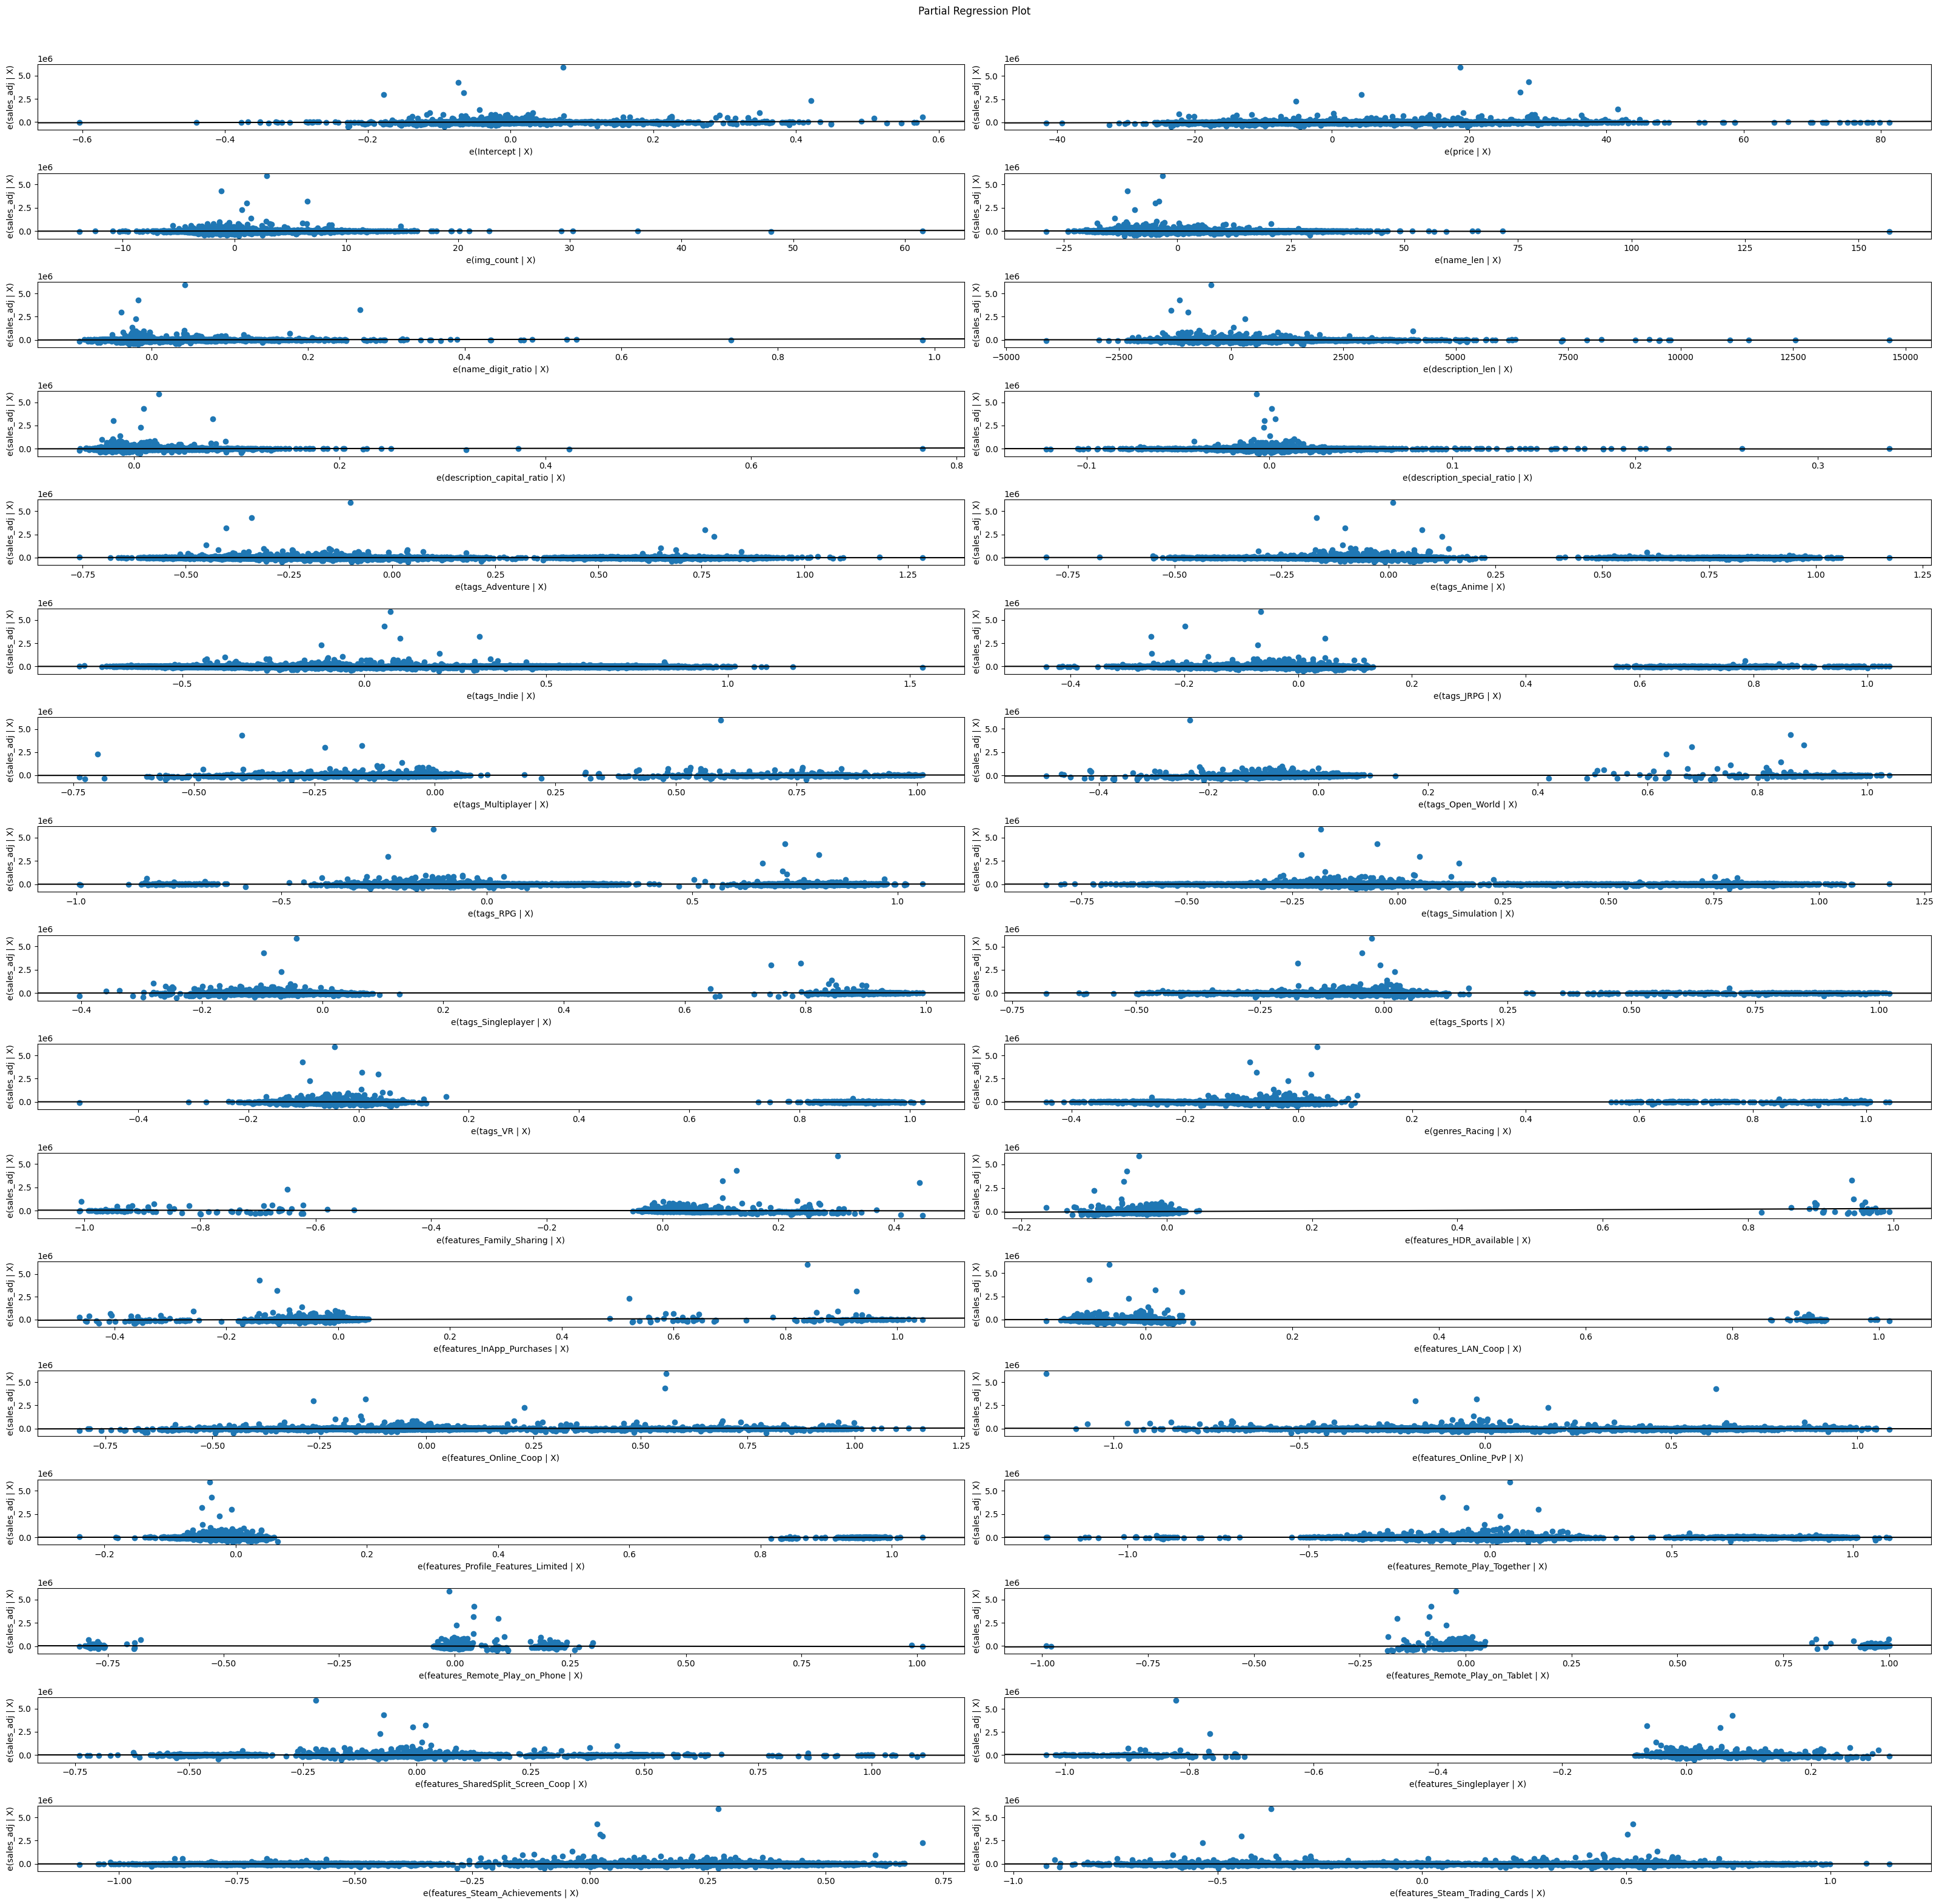

In [668]:
plt.rc("figure", figsize=(32,32))
sm.graphics.plot_partregress_grid(results)
plt.show()

One way of decreasing heteroskedasicity is by transforming variables to be closer to a normal distribution. As we're aware of our response variable being non-normal, we begin with transforming it through a log transform. This leads to our adjusted R-squared almost doubling, an excellent change.

In [67]:
mcols = list(df_train.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1).columns)
mcols_str = " + ".join(mcols)
results = smf.ols(f'np.log(sales_adj) ~ {mcols_str}', data=df_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(sales_adj)   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     41.64
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        05:38:04   Log-Likelihood:                -14270.
No. Observations:                8046   AIC:                         2.871e+04
Df Residuals:                    7961   BIC:                         2.930e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               9.1934      0.313     29.336      0.000       8.579       9.808
price                                   0.0139      0.001      9.367      0.000       0.011       0.017
img_count                               0.0372      0.005      7.386      0.000       0.027       0.047
link_count                             -0.0069      0.018     -0.383      0.702      -0.042       0.028
name_len                               -0.0127      0.002     -6.940      0.000      -0.016      -0.009
name_capital_ratio                      0.1312      0.088      1.494      0.135      -0.041       0.303
name_digit_ratio                        1.1376      0.384      2.964      0.003       0.385       1.890
name_special_ratio                      0.6898      0.289      2.385      0.017       0.123       1.257
description_len                     -2.504e-05   1.61e-05     -1.551      0.121   -5.67e-05    6.61e-06
description_capital_ratio               0.7741      0.662      1.168      0.243      -0.525       2.073
description_digit_ratio                -7.8942      2.905     -2.717      0.007     -13.589      -2.199
description_special_ratio              -1.5876      0.850     -1.869      0.062      -3.253       0.078
description_stopword_ratio             -0.9359      0.318     -2.941      0.003      -1.560      -0.312
description_avg_word_len                0.0072      0.005      1.550      0.121      -0.002       0.016
tags_2D                                -0.0564      0.079     -0.717      0.473      -0.210       0.098
tags_Action                            -0.0421      0.057     -0.745      0.456      -0.153       0.069
tags_Adventure                         -0.2094      0.050     -4.181      0.000      -0.308      -0.111
tags_Anime                             -0.0086      0.064     -0.133      0.894      -0.135       0.118
tags_Atmospheric                        0.0209      0.087      0.241      0.810      -0.150       0.191
tags_Casual                            -0.1088      0.060     -1.814      0.070      -0.226       0.009
tags_Cute                              -0.0037      0.088     -0.042      0.967      -0.175       0.168
tags_Exploration                       -0.3439      0.075     -4.574      0.000      -0.491      -0.197
tags_Female_Protagonist                -0.1730      0.067     -2.590      0.010      -0.304      -0.042
tags_FirstPerson                        0.1624      0.097      1.673      0.094      -0.028       0.353
tags_Horror                             0.3106      0.075      4.154      0.000       0.164       0.457
tags_Indie                             -0.2762      0.045     -6.104      0.000      -0.365      -0.187
tags_JRPG                              -0.1186      0.090     -1.32

We utilize stepwise feature selection once more to make the amount of coefficients we are utilizing more manageable. This time we end up with an adjusted R^2 decrease of 0.02 and only 31 less variables. The slight decrease in R^2 is worth the increase in parsimonity that is achieved here.

In [68]:
selected_features = stepwise_selection(df_train[mcols], np.log(df_train['sales_adj']))
mcols = list(selected_features['feature'])
mcols_str = " + ".join(mcols)
results = smf.ols(f'np.log(sales_adj) ~ {mcols_str}', data=df_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(sales_adj)   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     64.79
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        05:38:16   Log-Likelihood:                -14297.
No. Observations:                8046   AIC:                         2.870e+04
Df Residuals:                    7992   BIC:                         2.908e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             9.5656      0.248     38.606      0.000       9.080      10.051
price                                 0.0139      0.001     10.034      0.000       0.011       0.017
img_count                             0.0381      0.005      7.716      0.000       0.028       0.048
name_len                             -0.0136      0.002     -7.678      0.000      -0.017      -0.010
name_digit_ratio                      1.0757      0.382      2.812      0.005       0.326       1.825
name_special_ratio                    0.7109      0.288      2.465      0.014       0.146       1.276
description_len                   -2.587e-05   1.59e-05     -1.628      0.104    -5.7e-05    5.28e-06
description_capital_ratio             0.7380      0.631      1.170      0.242      -0.499       1.975
description_digit_ratio              -8.1739      2.838     -2.880      0.004     -13.738      -2.610
description_special_ratio            -1.9806      0.819     -2.418      0.016      -3.586      -0.375
description_stopword_ratio           -1.1580      0.271     -4.267      0.000      -1.690      -0.626
tags_Adventure                       -0.2403      0.038     -6.276      0.000      -0.315      -0.165
tags_Casual                          -0.0895      0.045     -1.976      0.048      -0.178      -0.001
tags_Exploration                     -0.3517      0.073     -4.785      0.000      -0.496      -0.208
tags_Female_Protagonist              -0.1825      0.066     -2.755      0.006      -0.312      -0.053
tags_FirstPerson                      0.1719      0.096      1.789      0.074      -0.016       0.360
tags_Horror                           0.3867      0.069      5.646      0.000       0.252       0.521
tags_Indie                           -0.2760      0.039     -7.094      0.000      -0.352      -0.200
tags_Multiplayer                      0.4924      0.078      6.320      0.000       0.340       0.645
tags_Nudity                           0.0613      0.105      0.584      0.559      -0.144       0.267
tags_Open_World                       0.7856      0.094      8.315      0.000       0.600       0.971
tags_Pixel_Graphics                   0.2263      0.072      3.151      0.002       0.086       0.367
tags_Point__Click                    -0.3574      0.084     -4.254      0.000      -0.522      -0.193
tags_RPG                             -0.0850      0.067     -1.272      0.203      -0.216       0.046
tags_Sexual_Content                   0.5350      0.093      5.772      0.000       0.353       0.717
tags_Simulation                      -0.2608      0.066     -3.945      0.000      -0.390      -0.131
tags_Singleplayer                     0.3277      0.061      5.411      0.000       0.209       0.446
tags_Sports            

Going through and plotting our residual diagnostic plots once more shows us that we have gotten much closer to a viable model with the residuals vs fitted graph looking much more random and the QQ plot much closer to normal. However our standarized residuals that are below -5 seem to be following a patter. We want to look further into that before we decide if this model is truly viable.

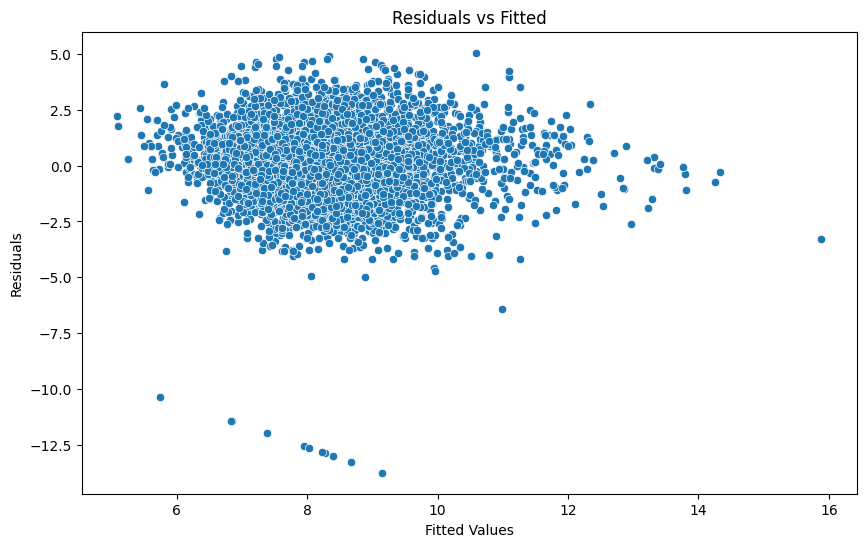

In [69]:
plt.rc("figure", figsize=(10,6))
sns.scatterplot(x=results.fittedvalues, y=results.resid)
plt.title('Residuals vs Fitted')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.show()

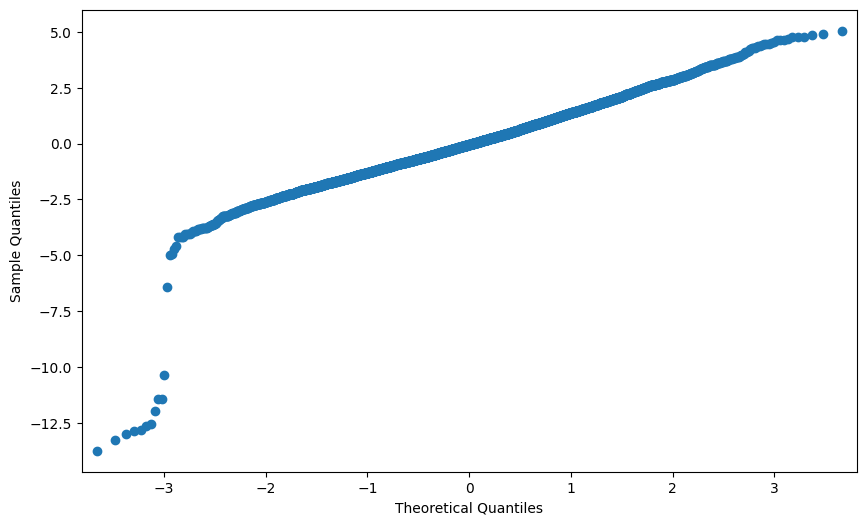

In [70]:
sm.qqplot(results.resid)
plt.show()

After looking into it we see that something very interesting has been caught by our diagnostic plots here. Out of these games which were predicted to have much more sales than they "actually" do, 11 out of the 13 are recorded as having no sales. This is another error in the data which we didn't catch before. As the author, personally owns two of these games, and there are reviews from paid customers on the other games we know that they do have sales. With another error from our data collection we will go ahead and drop these before retraining the model.

In [72]:
df_train.loc[results.resid[results.resid < -5].index]

,steamId,name,publisherClass,price,sales,img_count,link_count,sales_adj,name_len,name_capital_ratio,...,features_Stats,features_Steam_Achievements,features_Steam_Cloud,features_Steam_Leaderboards,features_Steam_Trading_Cards,features_Steam_Turn_Notifications,features_Steam_Workshop,features_Tracked_Controller_Support,features_VR_Only,features_VR_Supported
6202,386690,Fantastic Contraption,Indie,39.99,92,0,2,48.01,21,0.095238,...,0,1,1,0,1,0,1,1,1,0
9933,495700,Gabriel Knight: Sins of the Father®,AAA,5.99,0,0,0,0.01,35,0.114286,...,0,0,0,0,0,0,0,0,0,0
8721,844380,Cave Digger VR,Indie,19.99,0,0,4,0.01,14,0.285714,...,0,1,0,1,0,0,0,1,1,0
7922,1622270,COINS BATTLE,Indie,99.99,0,0,0,0.01,12,0.916667,...,0,1,0,1,0,0,0,0,0,0
8264,2165610,Mosaique Neko Waifus 5,Indie,2.99,0,2,0,0.01,22,0.136364,...,0,1,1,0,1,0,0,0,0,0
1239,1098292,DOOM Eternal: The Ancient Gods - Part One,AAA,19.99,0,0,0,0.01,41,0.243902,...,0,1,1,0,1,0,0,0,0,0
7977,1933490,Let's Play! Oink Games,Indie,24.99,185,0,0,97.01,22,0.181818,...,0,1,1,0,0,0,0,0,0,0
8443,1814170,Lingo,Indie,9.99,0,0,0,0.01,5,0.200000,...,0,1,1,1,0,0,1,0,0,0
7734,894340,Beat the Song,Indie,19.99,0,1,0,0.01,13,0.153846,...,1,0,1,1,0,0,0,0,0,0
8534,365820,Company of Heroes 2 - The British Forces,AAA,12.99,0,4,3,0.01,40,0.125000,...,1,1,1,0,1,0,1,0,0,0


In [73]:
df_train = df_train.drop(df_train.loc[results.resid[results.resid < -5].index].index)

By dropping just the erroneous data we gain a whole point in our adjusted R^2, and more importantly from our diagnostic plot we see that the model can be considered to meet the assumptions of a linear regression model with the erros being close enough to linear, homoscedastic, normal, and independent

In [74]:
selected_features = stepwise_selection(df_train[mcols], np.log(df_train['sales_adj']))
mcols = list(selected_features['feature'])
mcols_str = " + ".join(mcols)
results = smf.ols(f'np.log(sales_adj) ~ {mcols_str}', data=df_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(sales_adj)   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     72.00
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        05:45:12   Log-Likelihood:                -13820.
No. Observations:                8033   AIC:                         2.775e+04
Df Residuals:                    7979   BIC:                         2.813e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             9.5314      0.234     40.675      0.000       9.072       9.991
price                                 0.0144      0.001     10.936      0.000       0.012       0.017
img_count                             0.0348      0.005      7.466      0.000       0.026       0.044
name_len                             -0.0128      0.002     -7.595      0.000      -0.016      -0.009
name_digit_ratio                      1.0114      0.362      2.797      0.005       0.303       1.720
name_special_ratio                    0.7300      0.273      2.677      0.007       0.195       1.265
description_len                   -2.748e-05    1.5e-05     -1.829      0.067   -5.69e-05    1.98e-06
description_capital_ratio             0.8079      0.597      1.354      0.176      -0.362       1.978
description_digit_ratio              -6.9414      2.687     -2.584      0.010     -12.208      -1.675
description_special_ratio            -1.9609      0.774     -2.532      0.011      -3.479      -0.443
description_stopword_ratio           -1.1376      0.257     -4.432      0.000      -1.641      -0.634
tags_Adventure                       -0.2521      0.036     -6.964      0.000      -0.323      -0.181
tags_Casual                          -0.0840      0.043     -1.959      0.050      -0.168    3.65e-05
tags_Exploration                     -0.2802      0.070     -4.022      0.000      -0.417      -0.144
tags_Female_Protagonist              -0.2016      0.063     -3.220      0.001      -0.324      -0.079
tags_FirstPerson                      0.1987      0.091      2.184      0.029       0.020       0.377
tags_Horror                           0.3657      0.065      5.648      0.000       0.239       0.493
tags_Indie                           -0.2797      0.037     -7.601      0.000      -0.352      -0.208
tags_Multiplayer                      0.4945      0.074      6.713      0.000       0.350       0.639
tags_Nudity                           0.0573      0.099      0.578      0.563      -0.137       0.252
tags_Open_World                       0.7565      0.089      8.470      0.000       0.581       0.932
tags_Pixel_Graphics                   0.2095      0.068      3.086      0.002       0.076       0.343
tags_Point__Click                    -0.3379      0.080     -4.250      0.000      -0.494      -0.182
tags_RPG                             -0.0750      0.063     -1.187      0.235      -0.199       0.049
tags_Sexual_Content                   0.5293      0.088      6.043      0.000       0.358       0.701
tags_Simulation                      -0.3150      0.063     -5.031      0.000      -0.438      -0.192
tags_Singleplayer                     0.3094      0.057      5.405      0.000       0.197       0.422
tags_Sports            

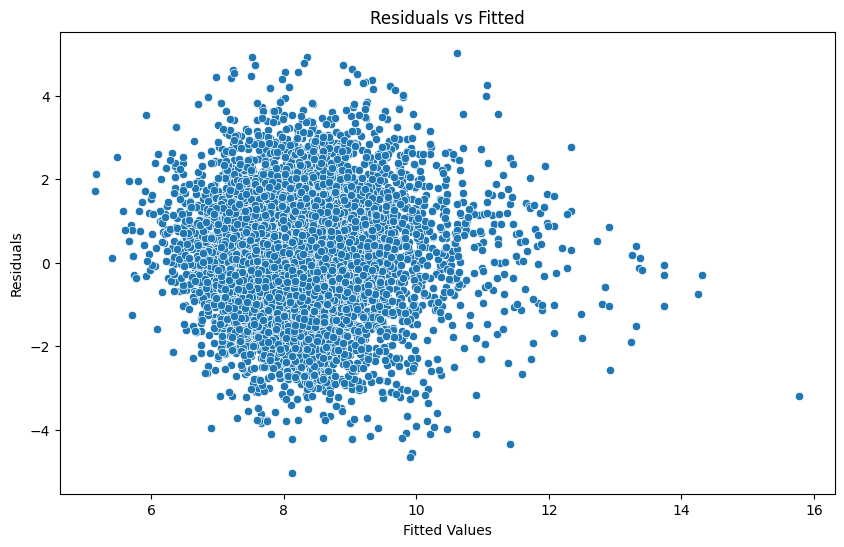

In [75]:
plt.rc("figure", figsize=(10,6))
sns.scatterplot(x=results.fittedvalues, y=results.resid)
plt.title('Residuals vs Fitted')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.show()

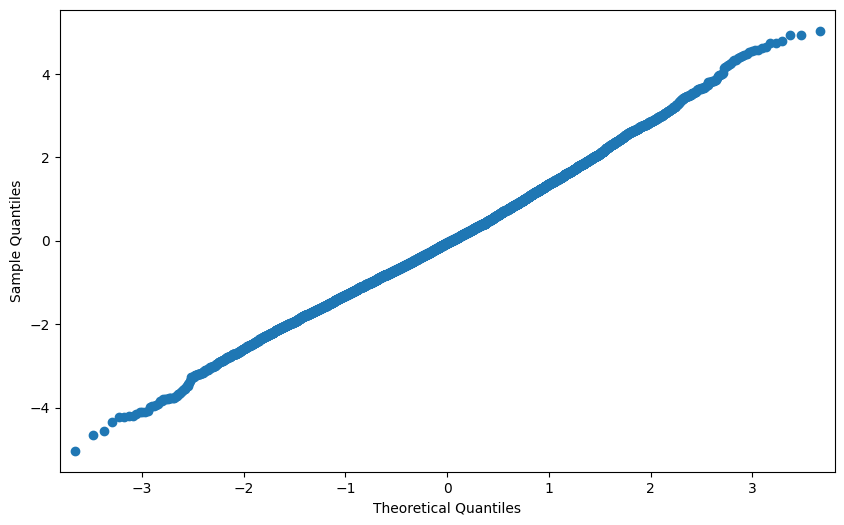

In [76]:
sm.qqplot(results.resid)
plt.show()

Below is a visualized form of the coefficients and the extent to which they effect sales.

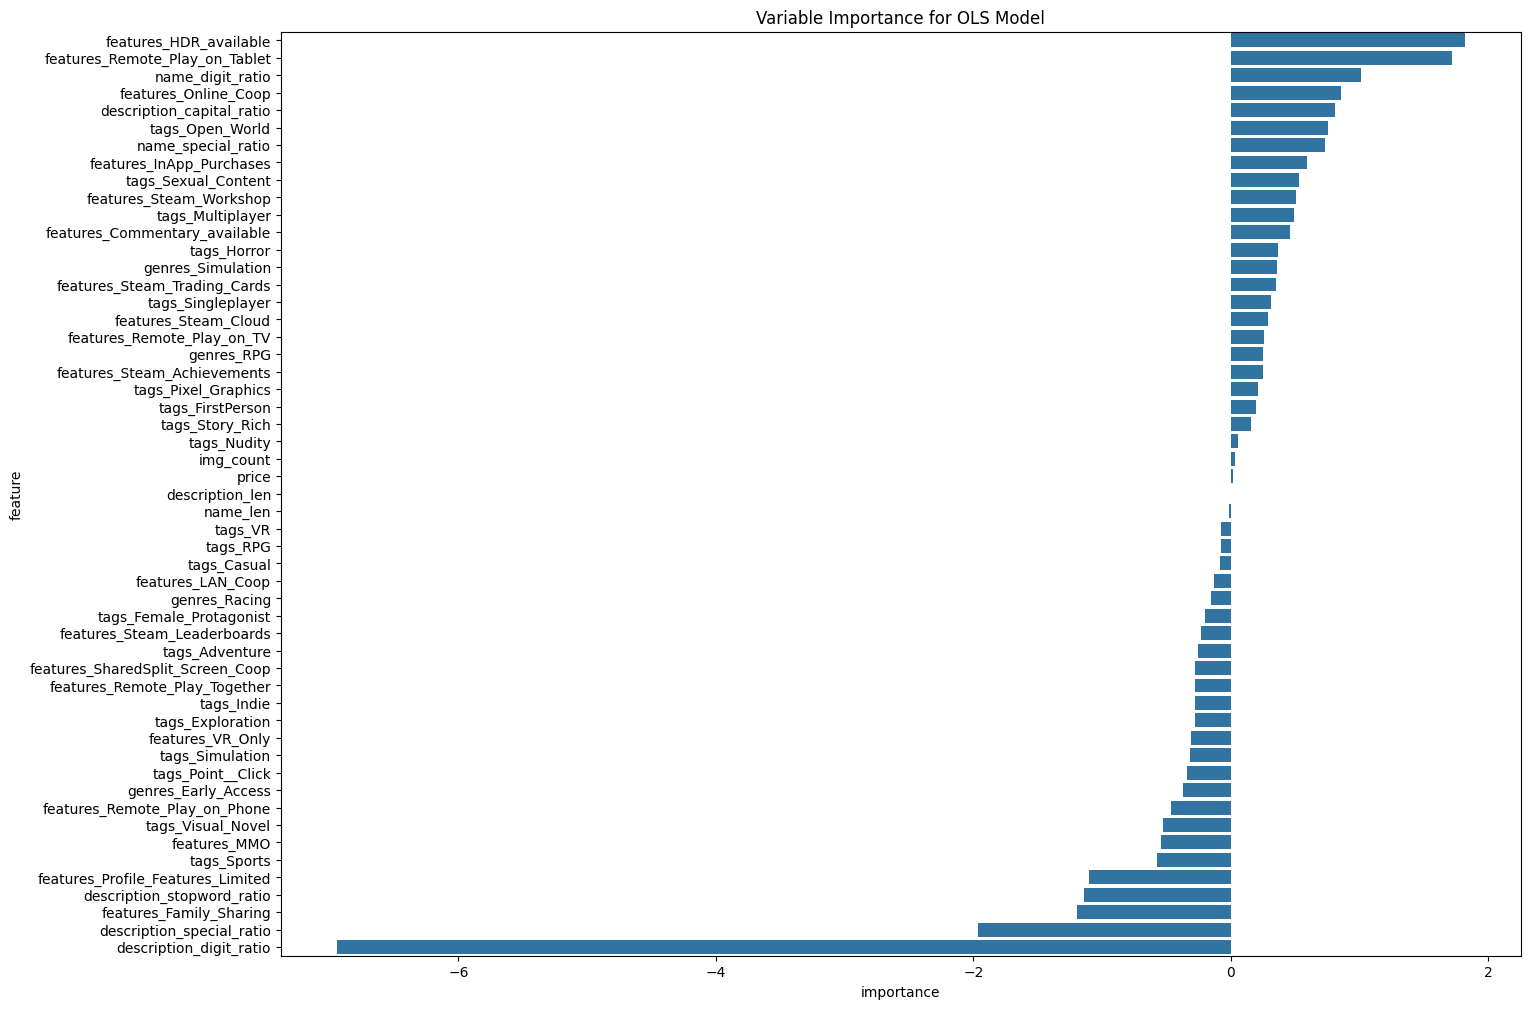

In [77]:
plt.rc("figure", figsize=(16,12))
importances = results.params[1:]
features = results.params[1:].index.tolist()

df_imp = pd.DataFrame({'feature': features, 'importance': importances})
df_imp = df_imp.sort_values('importance', ascending=False)

plt.tick_params(axis='y', labelsize=10)
sns.barplot(x='importance', y='feature', data=df_imp)
plt.title('Variable Importance for OLS Model')
plt.show()


#### OLS Lasso

We also attempt to reduce our variables utilize elasticnet regression, however we do not get much an improvement in our model our reduction in the variable used from our simple OLS with stepwise.

In [708]:
mcols = list(df_train.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1).columns)
mcols_str = " + ".join(mcols)
results_las = smf.ols(f'np.log(sales_adj) ~ {mcols_str}', data=df_train).fit_regularized(alpha=0.02, L1_wt=0.01, refit= True)

In [709]:
results_las.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(sales_adj)   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     55.11
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        21:10:59   Log-Likelihood:                -13799.
No. Observations:                8033   AIC:                         2.774e+04
Df Residuals:                    7963   BIC:                         2.824e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               9.2366      0.292     31.674      0.000       8.665       9.808
price                                   0.0146      0.001     10.442      0.000       0.012       0.017
img_count                               0.0350      0.005      7.382      0.000       0.026       0.044
link_count                             -0.0016      0.017     -0.093      0.926      -0.034       0.031
name_len                               -0.0118      0.002     -6.886      0.000      -0.015      -0.008
name_capital_ratio                      0.1492      0.083      1.800      0.072      -0.013       0.312
name_digit_ratio                        1.0107      0.359      2.814      0.005       0.307       1.715
name_special_ratio                      0.6927      0.273      2.540      0.011       0.158       1.227
description_len                     -3.074e-05   1.52e-05     -2.023      0.043   -6.05e-05    -9.6e-07
description_capital_ratio               0.7614      0.626      1.217      0.224      -0.465       1.988
description_digit_ratio                      0          0        nan        nan           0           0
description_special_ratio              -1.7876      0.798     -2.239      0.025      -3.353      -0.222
description_stopword_ratio             -0.7213      0.290     -2.487      0.013      -1.290      -0.153
description_avg_word_len                0.0050      0.004      1.144      0.253      -0.004       0.014
tags_2D                                      0          0        nan        nan           0           0
tags_Action                            -0.0499      0.053     -0.936      0.349      -0.154       0.055
tags_Adventure                         -0.2128      0.047     -4.512      0.000      -0.305      -0.120
tags_Anime                                   0          0        nan        nan           0           0
tags_Atmospheric                        0.0081      0.082      0.098      0.922      -0.153       0.169
tags_Casual                                  0          0        nan        nan           0           0
tags_Cute                                    0          0        nan        nan           0           0
tags_Exploration                       -0.2598      0.071     -3.654      0.000      -0.399      -0.120
tags_Female_Protagonist                -0.1839      0.063     -2.921      0.003      -0.307      -0.061
tags_FirstPerson                        0.1944      0.092      2.122      0.034       0.015       0.374
tags_Horror                             0.3008      0.071      4.263      0.000       0.163       0.439
tags_Indie                             -0.2786      0.042     -6.609      0.000      -0.361      -0.196
tags_JRPG                              -0.1492      0.083     -1.79

#### Decision Tree Model

We create a decision tree model to attempt to create a model that can provide interpretability in a visual form. We are required to restrict the depth and max nodes of the decision tree, or else it would perfectly fit itself to the training data.

In [632]:
clf = tree.DecisionTreeRegressor(max_depth = 10, max_leaf_nodes=25, random_state=1337)
clf = clf.fit(df_train.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1), df_train['sales_adj'])

We get an R^2 of 0.82 which is very good, but since decision trees have a tendency to overfit combined with the fact that they are worse at being regressors, we may need to watch this closely.

In [633]:
clf.score(df_train.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1), df_train['sales_adj'])

0.8192542560394891

We provide a visual representation of our decision tree below. The split values seem to be chosen quite arbitrarily looking at their extremely large squared errors which are in the billions of dollars squared. This tree example likely is not a good fit for our purposes.

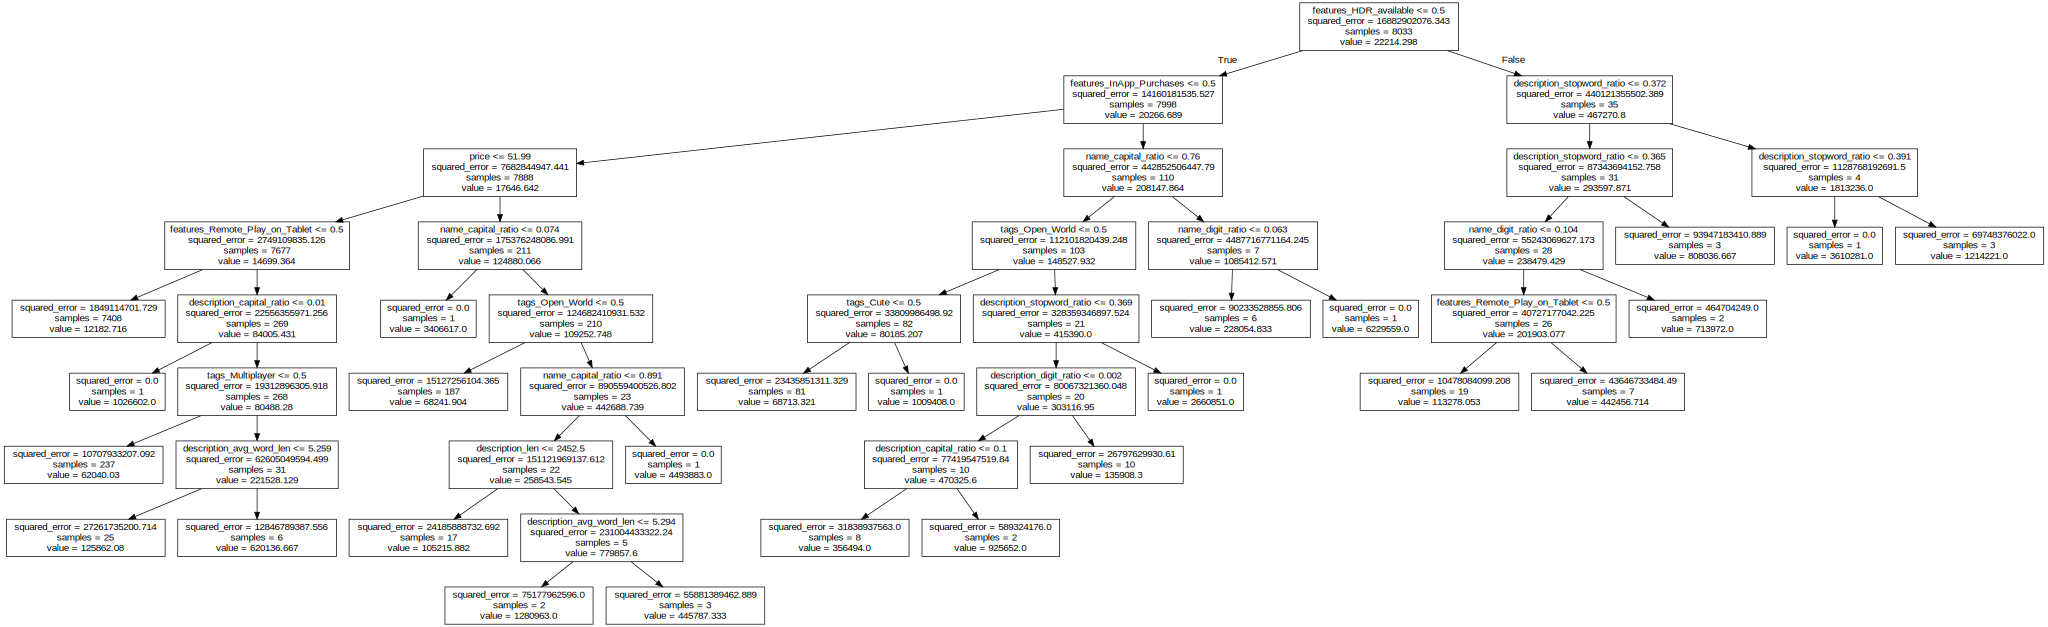

In [625]:
Source(tree.export_graphviz(clf, out_file=None, feature_names=df_train.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1).columns))

Below is the variable importance for the decision tree model visualed in graph form. This is not directional like the ordinary least squares regression unfortunately.

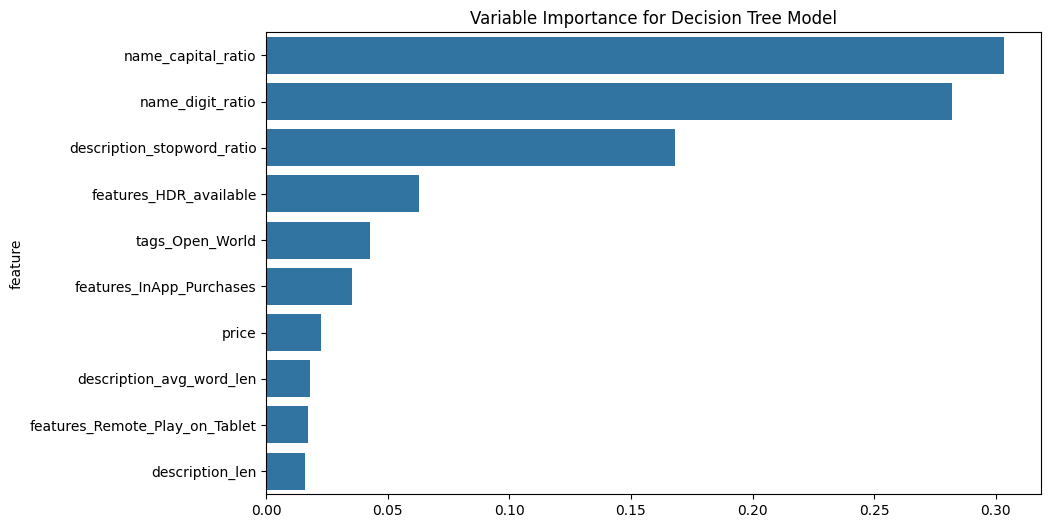

In [717]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = df_train.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1).columns
plt.rc("figure", figsize=(10,6))

sns.barplot(x=importances[indices][:10], y=features[indices][:10], orient='h')
plt.ylabel("feature")
plt.title('Variable Importance for Decision Tree Model')
plt.show()

#### XGBoost Model

The final model that we want to build is an XGBoost model. This is simply for the fact that an XGBoost model tends to be very accurate, and we want to attempt to use it as a benchmark for how well our two other models are faring in evaluation.

In [646]:
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=10, seed=1337)
model.fit(df_train.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1), df_train['sales_adj'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Looking at the R^2 of our XGBoost model we get 0.860 which does end up beating the decision tree model and the linear regression model. However we want to see how it fares in actual evaluation later on.

In [652]:
model.score(df_train.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1), df_train['sales_adj'])

0.8598255031807287

We're able to see the most important variables for the XGBoost model in absolute terms, but we don't know if in app purchases being part of a game increase or decrease sales.

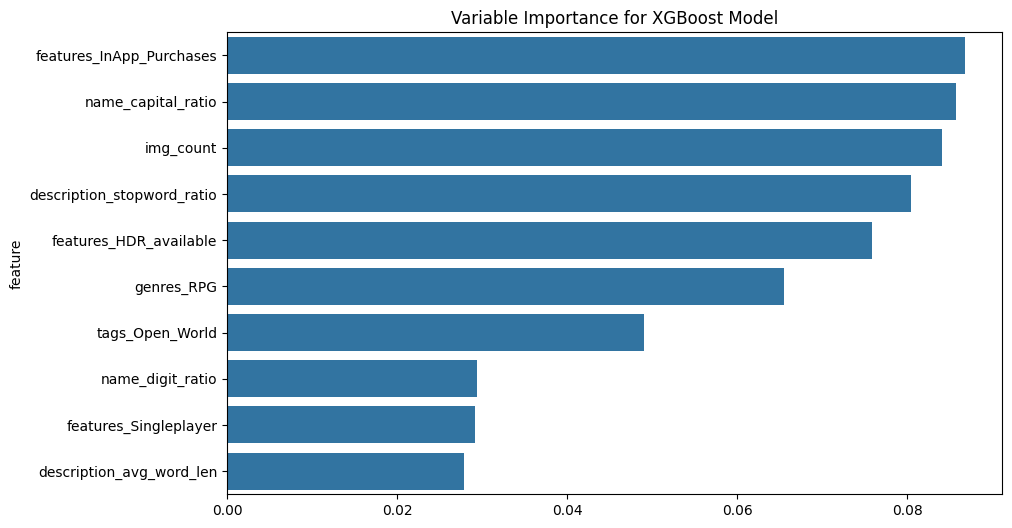

In [648]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = df_train.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1).columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10], orient='h')
plt.ylabel("feature")
plt.title('Variable Importance for XGBoost Model')
plt.show()

### Model Evaluation and Conclusion

With our regression models built, we want to see which one has the best performance for our purposes. We are evaluating the models that we have built on a combination of interpretability and the lowest RMSE on the test data to measure accuracy. With the interpretability being given to the OLS model purely for having readable coefficients while decision tree comes in second from being viewable directly.

In [711]:
ypred_train = np.exp(results.predict(df_train.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1)))
ypred_test = np.exp(results.predict(df_test.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1)))
rmse_train_res = rmse(df_train['sales_adj'], ypred_train)
rmse_test_res = rmse(df_test['sales_adj'], ypred_test)

In [712]:
ypred_train = clf.predict(df_train.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1))
ypred_test = clf.predict(df_test.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1))
rmse_train_clf = rmse(df_train['sales_adj'], ypred_train)
rmse_test_clf = rmse(df_test['sales_adj'], ypred_test)

In [714]:
ypred_train = model.predict(df_train.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1))
ypred_test = model.predict(df_test.drop(['sales','sales_adj','name','steamId','publisherClass'], axis = 1))
rmse_train_model = rmse(df_train['sales_adj'], ypred_train)
rmse_test_model = rmse(df_test['sales_adj'], ypred_test)

In a very interesting upset our OLS model starts with the worst training root mean squared error, however it seems to adjust to the data which we held out the best with the lowest test RMSE. The OLS model is the only one that showed improvement from the training RMSE. Still, 56,250 is a large average difference between actual and predicted sales. However, it is overall the best model we get and we can consider the parameters from this to be a good guiding direction on what may influence game sales within the first month.

In [715]:
df = pd.DataFrame({
    'Model': ['OLS', 'Decision Tree', 'XGBoost'],
    'RMSE Train': [rmse_train_res, rmse_train_clf, rmse_train_model],
    'RMSE Test': [rmse_test_res, rmse_test_clf, rmse_test_model]
})


print(df.to_string())

           Model     RMSE Train      RMSE Test
0            OLS  145906.965304   56250.396181
1  Decision Tree   55240.498694  121024.158375
2        XGBoost   48647.222977   80731.434776


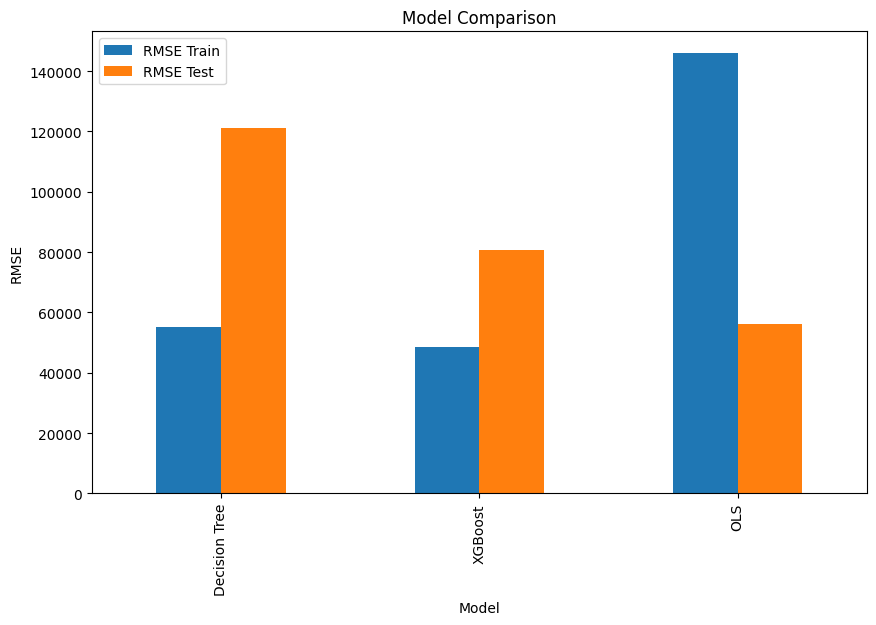

In [719]:
df_sorted = df.sort_values(by='RMSE Test', ascending=False)
df_sorted.plot.bar(x='Model', y=['RMSE Train', 'RMSE Test'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Comparison')
plt.show()

To close out our results section we take a look at the variables within the OLS model again. We see that there are multiple features that can be implemented to increase sales, however some features may also tend to decrease sales.

<ipython-input-730-7885ffd6c2e6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=df_imp, palette=colors)


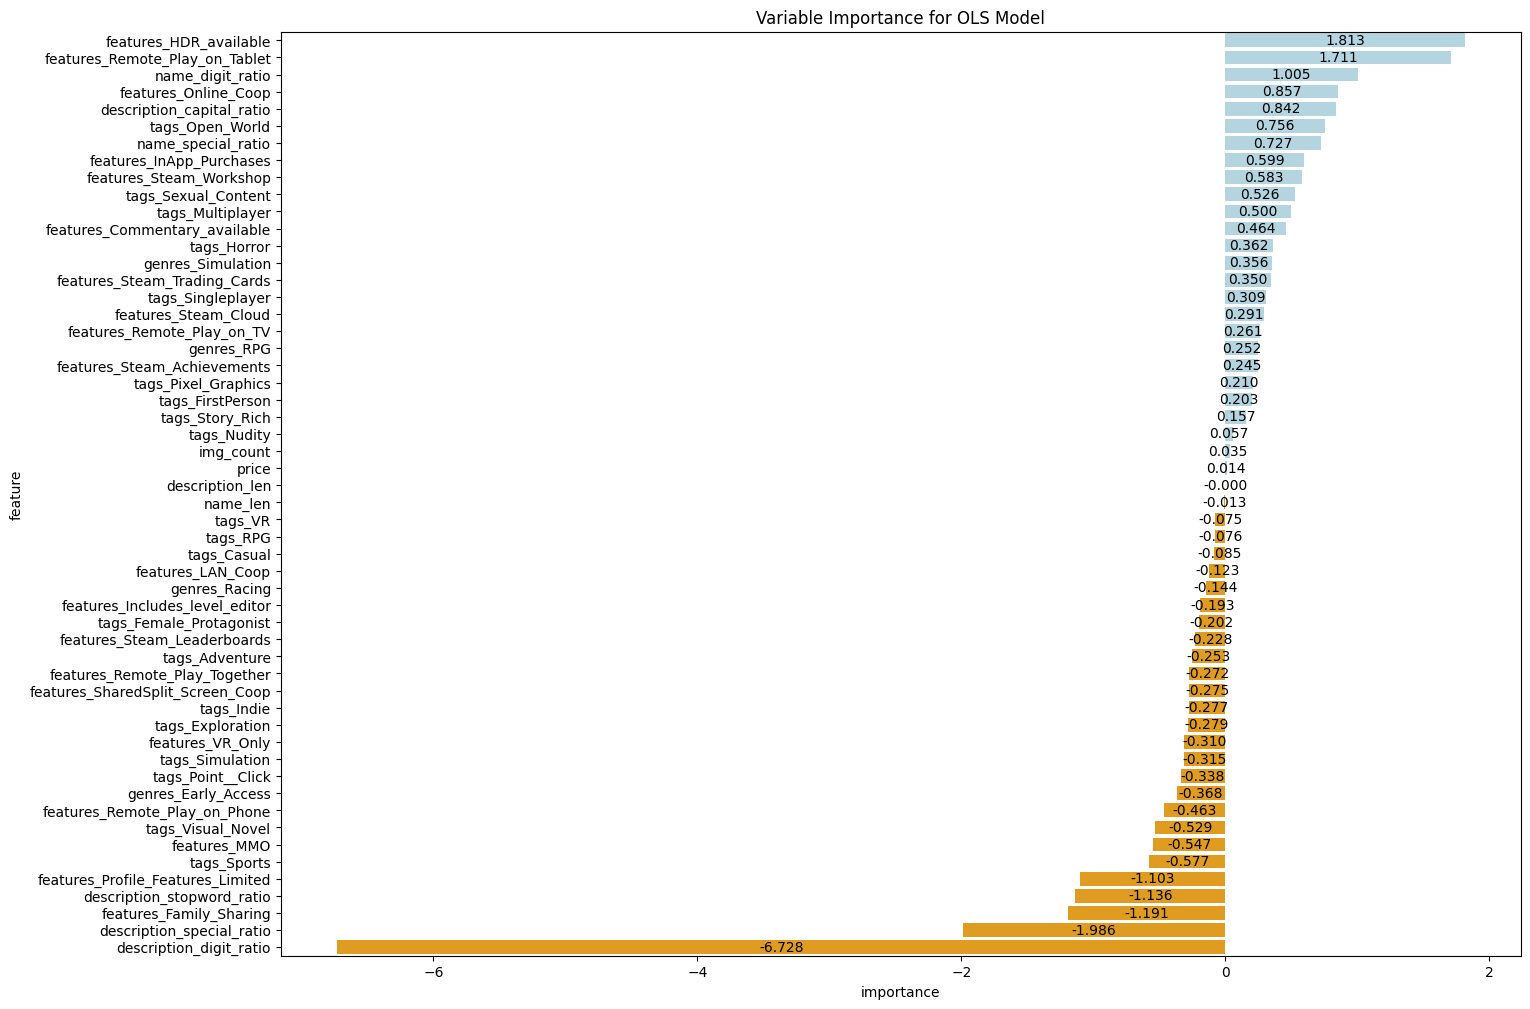

In [730]:
importances = results.params[1:]
features = results.params[1:].index.tolist()

df_imp = pd.DataFrame({'feature': features, 'importance': importances})
df_imp = df_imp.sort_values('importance', ascending=False)

colors = ['orange' if importance < 0 else 'lightblue' for importance in df_imp['importance']]

plt.rc("figure", figsize=(16,12))
plt.tick_params(axis='y', labelsize=10)
sns.barplot(x='importance', y='feature', data=df_imp, palette=colors)
plt.title('Variable Importance for OLS Model')

for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                   '{:.3f}'.format(df_imp['importance'][i]), ha='center', va='center', color='black')

plt.show()

## Summary and Future Works

We started this investigation with a simple question:
What developer actions and game features can small game developers listing their game on Steam utilize to achieve the most sales?
Our actions focused on retrieving data from different APIs to scrounge up as much information as we could in games made within the past 10 years. We focused on information that a developer would be able to change rather than things that were not under their control such as what year it was. We processed the data that was acquired through API to adjust our historical sales and get more features from text fields. Finally, we built models and compared them to each other head to head. The model most interesting to us is not super accurate or a good fit to game sales data, but it is sufficient to provide us with guiding information on what features a game developer should try to utilize for increasing their game sales such as providing support for HDR, while avoiding having many numbers in the description of the game.

There are many things that we wish we could have improved on and would like to see in future works such as:
*  Finding a data source for historical sales that did not have as many errors as we were seeing while going through the data processing. Additionally, a data source which had historical data for exactly 30 days after release would provide our model better results.
*  Spreading out our queries under even more time to gather data for the entirety of the games that were released within the past 10 years rather than being ip banned after retrieving just a portion.
*  A method to collect data on how developers and publishers were posting about their games on social media or utilizing marketing through ads and influencers to push for game sales.
*  A method to utilize the day and month information within our date that could account for periods of times that games are more or less likely to sell. This would lead to better guidance for possible release dates for developers. Additionally, the method would take into account possible games that are releasing at the same time and creating competition making a game a harder sell.
*  An indicator of data for if the game was released at a discounted sale or not.
*  A better method for processing the name and description strings. Perhaps utilizing sentiment analysis for the description and accounting for where images are placed.
*  Perhaps there are models better suited to our data which also carry high interpretability for our data.
*  Extending this model for use by actual developers to input information about their game and getting recommendations for what steps they should do next to increase revenue would be the ultimate goal for taking the project all the way to the end.
